# PDP 명점불량원인 도출 프로젝트

In [1]:
 import pandas as pd
import numpy as np
from sklearn.preprocessing import scale,minmax_scale,robust_scale
#%matplotlib inline background 그래프 실행 및 결과 확인
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
#예측
from sklearn.tree import export_graphviz 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
#평가함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
#모델 성능 평가
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#confusion matrix
from sklearn.metrics import confusion_matrix

#Scale 변환:평균,표준편차 기준
from sklearn.preprocessing import StandardScaler
#주성분 분석
from sklearn.decomposition import PCA
#회귀분석
import statsmodels.api as sm
#RMSE:root mean squared error 함수
def root_mean_squared_error(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))
#MAPE:mean absolute percentage error 함수
def mean_absolute_percentage_error(y_true,y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100
#분류 : KNN
from sklearn.neighbors import KNeighborsClassifier
#로지스틱 회귀
from statsmodels.api import Logit
#데이터 분항
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import os
import graphviz
from sklearn.metrics import f1_score
from scipy.stats import chi2_contingency
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib
import seaborn as sns
import time
import warnings
warnings.filterwarnings(action='ignore')
plt.rcParams['font.family']='NanumGothic'

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
# 최대 열 수 설정
pd.set_option('display.max_columns', 500)
# 표시할 가로의 길이
pd.set_option('display.width', 1000)



## 데이터 불러오기

In [3]:
df=pd.read_csv("/home/piai/Desktop/POSCO_Ai-BigData_academy/Week4_BigData_Project/Data/Data결측치제거Merge/MFG_ALL_NULLOUT.csv",engine="python",encoding='EUC-KR')
df.head()

JUDGE   LOT_ID PANEL_ID      TIME_1BLACK         TIME_2AG         TIME_3BUS      TIME_4DIELEC        TIME_5MGO        TIME_6PHOS       TIME_7PASTE       TIME_8AGING MC_1BLACK_1PRINT MC_1BLACK_2RTD MC_2AG_1PRINT MC_2AG_2RTD MC_2AG_3EXPOSURE MC_3BUS_1DEVELOP MC_3BUS_2FIRE MC_4DIELEC_1FIRE MC_5MGO MC_6PHOS_1R_1DISPENSER MC_6PHOS_1R_2DRY MC_6PHOS_2G_1DISPENSER MC_6PHOS_2G_2DRY MC_6PHOS_3B_1DISPENSER MC_6PHOS_4FIRE MC_7PASTE MC_8AGING  TAT_1BLACK_1PRINT  TAT_1BLACK_2RTD  TAT_2AG_1PRINT  TAT_2AG_2RTD  TAT_2AG_3EXPOSURE  TAT_3BUS_1DEVELOP  TAT_3BUS_2FIRE  TAT_4DIELEC_FIRE  TAT_5MGO  TAT_6PHOS_1R_1DISPENSER  TAT_6PHOS_1R_2DRY  TAT_6PHOS_2G_1DISPENSER  TAT_6PHOS_2G_2DRY  TAT_6PHOS_3B_1DISPENSER  TAT_6PHOS_4FIRE  TAT_7PASTE  TAT_8AGING  BLACK_RTD_TEMP_GLASS_START  BLACK_RTD_TEMP_GLASS_END  BLACK_RTD_TEMP_WALL_START  BLACK_RTD_TEMP_WALL_MAX  BLACK_RTD_PRES_START  BLACK_RTD_PRES_END  BLACK_RTD_TEMP_GLASS_OUT  BLACK_RTD_TEMP_HOOD_START  BLACK_RTD_TEMP_HOOD_MAX  AG_RTD_TEMP_GLASS_START  \
0    양품  LOT-101   PNL-01  2019-04-01 0:01  2019-04-01 5:21  2019-04-01 11:01  2019-04-06 13:41  2019-04-11 3:41  2019-04-03 20:20  2019-04-11 12:41  2019-04-11 14:21              2호기            2호기           1호기         1호기              2호기              1호기           1호기              3호기     1호기                    1호기              2호기                    2호기              2호기                    1호기            3호기       1호기       2호기                 86            220.0            83.0            74              160.0              416.0          6900.0            6447.0     530.0                     76.0              333.0                     88.0              396.0                     86.0           7140.0         0.0     10074.0                        44.3                     102.3                       88.8                    114.8                 229.5               156.5                      58.9                       93.2                     96.0                     46.0   
1    양품  LOT-101   PNL-02  2019-04-01 0:45  2019-04-01 6:05  2019-04-01 11:45  2019-04-06 14:25  2019-04-11 4:25  2019-04-03 21:04  2019-04-11 13:25  2019-04-11 15:05              2호기            2호기           1호기         1호기              2호기              1호기           1호기              3호기     1호기                    1호기              2호기                    2호기              2호기                    1호기            3호기       1호기       2호기                 86            210.0            84.0            71              150.0              372.0          6693.0            6600.0     530.0                     80.0              438.0                     82.0              381.0                     84.0           6956.0         0.0     10075.0                        44.6                     101.6                       88.7                    114.3                 216.9               155.9                      59.0                       93.9                     96.0                     46.0   
2    양품  LOT-101   PNL-03  2019-04-01 1:29  2019-04-01 6:49  2019-04-01 12:29  2019-04-06 15:09  2019-04-11 5:09  2019-04-03 21:48  2019-04-11 14:09  2019-04-11 15:49              2호기            2호기           1호기         1호기              2호기              1호기           1호기              3호기     1호기                    1호기              2호기                    2호기              2호기                    1호기            3호기       1호기       2호기                 78            220.0            78.0            69              148.0              368.0          6747.0            6597.0     530.0                     80.0              420.0                     92.0              396.0                     86.0           6840.0         0.0     10645.0                        45.0                     114.3                       90.3                    115.0                 217.4               140.6                      58.7                       94.0                     95.7                     45.0   
3    양품  LOT-101   PNL-04  2019-04

In [4]:
df.describe()

TAT_1BLACK_1PRINT  TAT_1BLACK_2RTD  TAT_2AG_1PRINT  TAT_2AG_2RTD  TAT_2AG_3EXPOSURE  TAT_3BUS_1DEVELOP  TAT_3BUS_2FIRE  TAT_4DIELEC_FIRE     TAT_5MGO  TAT_6PHOS_1R_1DISPENSER  TAT_6PHOS_1R_2DRY  TAT_6PHOS_2G_1DISPENSER  TAT_6PHOS_2G_2DRY  TAT_6PHOS_3B_1DISPENSER  TAT_6PHOS_4FIRE  TAT_7PASTE    TAT_8AGING  BLACK_RTD_TEMP_GLASS_START  BLACK_RTD_TEMP_GLASS_END  BLACK_RTD_TEMP_WALL_START  BLACK_RTD_TEMP_WALL_MAX  BLACK_RTD_PRES_START  BLACK_RTD_PRES_END  BLACK_RTD_TEMP_GLASS_OUT  BLACK_RTD_TEMP_HOOD_START  BLACK_RTD_TEMP_HOOD_MAX  AG_RTD_TEMP_GLASS_START  AG_RTD_TEMP_GLASS_END  AG_RTD_TEMP_WALL_START  AG_RTD_TEMP_WALL_MAX  AG_RTD_PRES_START  AG_RTD_PRES_END  AG_RTD_TEMP_GLASS_OUT  AG_RTD_TEMP_HOOD_START  AG_RTD_TEMP_HOOD_MAX  AG_EXPOSURE_TEMP_MASK  BUS_DEVELOP_TEMP_OVEN1  BUS_DEVELOP_TEMP_OVEN2  BUS_DEVELOP_TEMP_OVEN3  BUS_DEVELOP_PH_TANK1  BUS_DEVELOP_TEMP_TANK1  BUS_DEVELOP_PH_TANK1 2  BUS_DEVELOP_TEMP_TANK2  BUS_DEVELOP_PH_TANK1 3  BUS_DEVELOP_TEMP_TANK3  BUS_DEVELOP_PRES1  \
count        4000.000000      4000.000000     4000.000000   4000.000000        4000.000000        4000.000000     4000.000000       4000.000000  4000.000000              4000.000000        4000.000000              4000.000000        4000.000000              4000.000000      4000.000000      4000.0   4000.000000                 4000.000000               4000.000000                4000.000000              4000.000000           4000.000000         4000.000000               4000.000000                4000.000000              4000.000000              4000.000000            4000.000000             4000.000000           4000.000000        4000.000000      4000.000000            4000.000000             4000.000000           4000.000000            4000.000000             4000.000000             4000.000000             4000.000000          4.000000e+03             4000.000000             4000.000000             4000.000000             4000.000000             4000.000000             4000.0   
mean           87.695250       219.492500       84.541000     70.564750         162.145750         370.958000     6971.902875       6520.513125   533.882500                80.127250         404.333625                80.879250         377.099250                83.935000      7116.312625         0.0   9975.431250                   44.081775                107.820187                  88.905275               114.794687            197.407963          170.106125                 58.882862                  93.419663                96.145012                45.652850             138.105775               77.857300            101.768375         347.580100       381.787675              44.316425               93.066750             93.515825              23.529358               60.939329               61.773119               62.172306         -3.300000e-01               23.389310                9.199703               30.979652                6.549617               34.151797                0.0   
std             4.709981        15.344423        3.189414      2.490453          43.548497          21.883189      257.173258        203.713659    20.495273                 9.997402          63.447521                10.345116          30.266089                 9.441666       416.712066         0.0    195.296043                    1.325205                  5.642725                   0.993252                 0.752194             26.439556           30.755638                  0.662441                   1.214246                 1.235008                 1.081623               0.768106                1.200986              0.993166          34.125256        34.202460               2.454608                2.573993              2.670808               0.160216                0.876107                1.386606                1.563911          2.442796e-15                0.147799                0.000522                0.356364                0.008833                1.126896                0.0   
min            74.0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 141 entries, JUDGE to PHOS_FIRE_EXHAUST_HEAT4
dtypes: float64(111), int64(2), object(28)
memory usage: 4.3+ MB


In [6]:
df

JUDGE   LOT_ID PANEL_ID       TIME_1BLACK         TIME_2AG         TIME_3BUS      TIME_4DIELEC        TIME_5MGO        TIME_6PHOS       TIME_7PASTE       TIME_8AGING MC_1BLACK_1PRINT MC_1BLACK_2RTD MC_2AG_1PRINT MC_2AG_2RTD MC_2AG_3EXPOSURE MC_3BUS_1DEVELOP MC_3BUS_2FIRE MC_4DIELEC_1FIRE MC_5MGO MC_6PHOS_1R_1DISPENSER MC_6PHOS_1R_2DRY MC_6PHOS_2G_1DISPENSER MC_6PHOS_2G_2DRY MC_6PHOS_3B_1DISPENSER MC_6PHOS_4FIRE MC_7PASTE MC_8AGING  TAT_1BLACK_1PRINT  TAT_1BLACK_2RTD  TAT_2AG_1PRINT  TAT_2AG_2RTD  TAT_2AG_3EXPOSURE  TAT_3BUS_1DEVELOP  TAT_3BUS_2FIRE  TAT_4DIELEC_FIRE  TAT_5MGO  TAT_6PHOS_1R_1DISPENSER  TAT_6PHOS_1R_2DRY  TAT_6PHOS_2G_1DISPENSER  TAT_6PHOS_2G_2DRY  TAT_6PHOS_3B_1DISPENSER  TAT_6PHOS_4FIRE  TAT_7PASTE  TAT_8AGING  BLACK_RTD_TEMP_GLASS_START  BLACK_RTD_TEMP_GLASS_END  BLACK_RTD_TEMP_WALL_START  BLACK_RTD_TEMP_WALL_MAX  BLACK_RTD_PRES_START  BLACK_RTD_PRES_END  BLACK_RTD_TEMP_GLASS_OUT  BLACK_RTD_TEMP_HOOD_START  BLACK_RTD_TEMP_HOOD_MAX  AG_RTD_TEMP_GLASS_START  \
0       양품  LOT-101   PNL-01   2019-04-01 0:01  2019-04-01 5:21  2019-04-01 11:01  2019-04-06 13:41  2019-04-11 3:41  2019-04-03 20:20  2019-04-11 12:41  2019-04-11 14:21              2호기            2호기           1호기         1호기              2호기              1호기           1호기              3호기     1호기                    1호기              2호기                    2호기              2호기                    1호기            3호기       1호기       2호기                 86            220.0            83.0            74              160.0              416.0          6900.0            6447.0     530.0                     76.0              333.0                     88.0              396.0                     86.0           7140.0         0.0     10074.0                        44.3                     102.3                       88.8                    114.8                 229.5               156.5                      58.9                       93.2                     96.0                     46.0   
1       양품  LOT-101   PNL-02   2019-04-01 0:45  2019-04-01 6:05  2019-04-01 11:45  2019-04-06 14:25  2019-04-11 4:25  2019-04-03 21:04  2019-04-11 13:25  2019-04-11 15:05              2호기            2호기           1호기         1호기              2호기              1호기           1호기              3호기     1호기                    1호기              2호기                    2호기              2호기                    1호기            3호기       1호기       2호기                 86            210.0            84.0            71              150.0              372.0          6693.0            6600.0     530.0                     80.0              438.0                     82.0              381.0                     84.0           6956.0         0.0     10075.0                        44.6                     101.6                       88.7                    114.3                 216.9               155.9                      59.0                       93.9                     96.0                     46.0   
2       양품  LOT-101   PNL-03   2019-04-01 1:29  2019-04-01 6:49  2019-04-01 12:29  2019-04-06 15:09  2019-04-11 5:09  2019-04-03 21:48  2019-04-11 14:09  2019-04-11 15:49              2호기            2호기           1호기         1호기              2호기              1호기           1호기              3호기     1호기                    1호기              2호기                    2호기              2호기                    1호기            3호기       1호기       2호기                 78            220.0            78.0            69              148.0              368.0          6747.0            6597.0     530.0                     80.0              420.0                     92.0              396.0                     86.0           6840.0         0.0     10645.0                        45.0                     114.3                       90.3                    115.0                 217.4               140.6                      58.7                       94.0                     95.7                     45.0   
3       양품  LOT-101  

### 양품 => 0 명점 =>1

In [7]:
for x in range(4000):
    if df['JUDGE'][x]=='양품':
        df['JUDGE'][x]=0
    else :
        df['JUDGE'][x]=1
        

### LOT-101    =>  101

In [9]:
for x in range(4000):
    df['LOT_ID'][x]=int(df['LOT_ID'][x][4:])
    

### PNL-01 => 01 

In [10]:
for x in range(4000):
    df['PANEL_ID'][x]=df['PANEL_ID'][x][4:]
    

## 목표변수 (y= 'JUDGE')  

In [12]:
x=df.drop('JUDGE',axis=1)
y=df['JUDGE']

In [14]:
Black=['BLACK_RTD_TEMP_GLASS_START',
       'BLACK_RTD_TEMP_GLASS_END',
       'BLACK_RTD_TEMP_WALL_START','BLACK_RTD_TEMP_WALL_MAX','BLACK_RTD_PRES_START','BLACK_RTD_PRES_END','BLACK_RTD_TEMP_GLASS_OUT','BLACK_RTD_TEMP_HOOD_START','BLACK_RTD_TEMP_HOOD_MAX']
for col in Black:
    df.boxplot(column =col ,by = "JUDGE")

LOT_ID PANEL_ID       TIME_1BLACK         TIME_2AG         TIME_3BUS      TIME_4DIELEC        TIME_5MGO        TIME_6PHOS       TIME_7PASTE       TIME_8AGING MC_1BLACK_1PRINT MC_1BLACK_2RTD MC_2AG_1PRINT MC_2AG_2RTD MC_2AG_3EXPOSURE MC_3BUS_1DEVELOP MC_3BUS_2FIRE MC_4DIELEC_1FIRE MC_5MGO MC_6PHOS_1R_1DISPENSER MC_6PHOS_1R_2DRY MC_6PHOS_2G_1DISPENSER MC_6PHOS_2G_2DRY MC_6PHOS_3B_1DISPENSER MC_6PHOS_4FIRE MC_7PASTE MC_8AGING  TAT_1BLACK_1PRINT  TAT_1BLACK_2RTD  TAT_2AG_1PRINT  TAT_2AG_2RTD  TAT_2AG_3EXPOSURE  TAT_3BUS_1DEVELOP  TAT_3BUS_2FIRE  TAT_4DIELEC_FIRE  TAT_5MGO  TAT_6PHOS_1R_1DISPENSER  TAT_6PHOS_1R_2DRY  TAT_6PHOS_2G_1DISPENSER  TAT_6PHOS_2G_2DRY  TAT_6PHOS_3B_1DISPENSER  TAT_6PHOS_4FIRE  TAT_7PASTE  TAT_8AGING  BLACK_RTD_TEMP_GLASS_START  BLACK_RTD_TEMP_GLASS_END  BLACK_RTD_TEMP_WALL_START  BLACK_RTD_TEMP_WALL_MAX  BLACK_RTD_PRES_START  BLACK_RTD_PRES_END  BLACK_RTD_TEMP_GLASS_OUT  BLACK_RTD_TEMP_HOOD_START  BLACK_RTD_TEMP_HOOD_MAX  AG_RTD_TEMP_GLASS_START  \
0       101       01   2019-04-01 0:01  2019-04-01 5:21  2019-04-01 11:01  2019-04-06 13:41  2019-04-11 3:41  2019-04-03 20:20  2019-04-11 12:41  2019-04-11 14:21              2호기            2호기           1호기         1호기              2호기              1호기           1호기              3호기     1호기                    1호기              2호기                    2호기              2호기                    1호기            3호기       1호기       2호기                 86            220.0            83.0            74              160.0              416.0          6900.0            6447.0     530.0                     76.0              333.0                     88.0              396.0                     86.0           7140.0         0.0     10074.0                        44.3                     102.3                       88.8                    114.8                 229.5               156.5                      58.9                       93.2                     96.0                     46.0   
1       101       02   2019-04-01 0:45  2019-04-01 6:05  2019-04-01 11:45  2019-04-06 14:25  2019-04-11 4:25  2019-04-03 21:04  2019-04-11 13:25  2019-04-11 15:05              2호기            2호기           1호기         1호기              2호기              1호기           1호기              3호기     1호기                    1호기              2호기                    2호기              2호기                    1호기            3호기       1호기       2호기                 86            210.0            84.0            71              150.0              372.0          6693.0            6600.0     530.0                     80.0              438.0                     82.0              381.0                     84.0           6956.0         0.0     10075.0                        44.6                     101.6                       88.7                    114.3                 216.9               155.9                      59.0                       93.9                     96.0                     46.0   
2       101       03   2019-04-01 1:29  2019-04-01 6:49  2019-04-01 12:29  2019-04-06 15:09  2019-04-11 5:09  2019-04-03 21:48  2019-04-11 14:09  2019-04-11 15:49              2호기            2호기           1호기         1호기              2호기              1호기           1호기              3호기     1호기                    1호기              2호기                    2호기              2호기                    1호기            3호기       1호기       2호기                 78            220.0            78.0            69              148.0              368.0          6747.0            6597.0     530.0                     80.0              420.0                     92.0              396.0                     86.0           6840.0         0.0     10645.0                        45.0                     114.3                       90.3                    115.0                 217.4               140.6                      58.7                       94.0                     95.7                     45.0   
3       101       04   2019-04-01 2:13  2019-04-01 7:

## Process_Black 온도별 이상치 확인

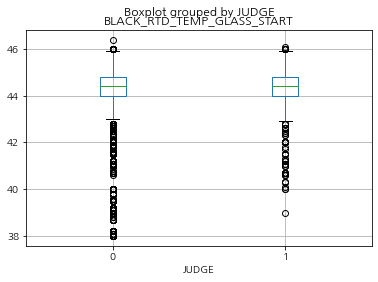

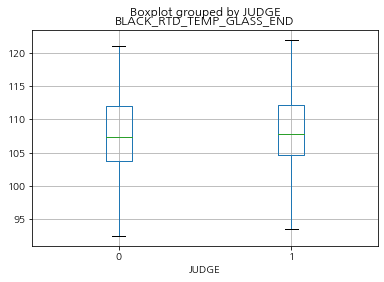

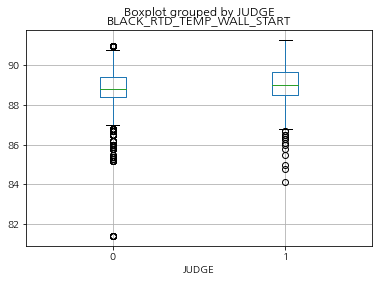

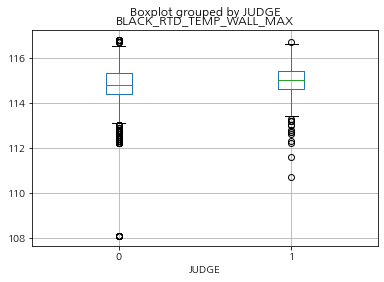

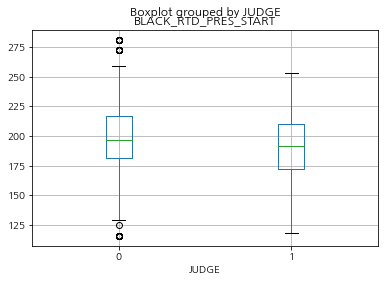

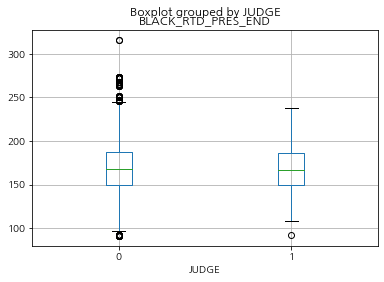

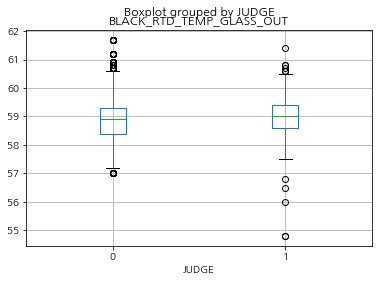

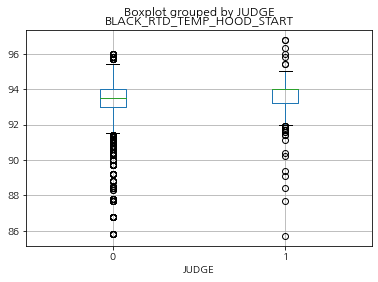

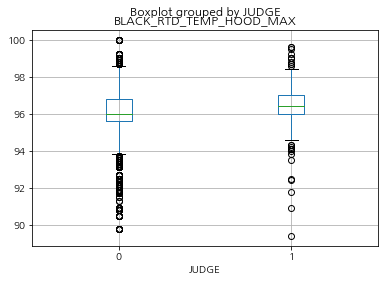

In [15]:
Black=['BLACK_RTD_TEMP_GLASS_START',
       'BLACK_RTD_TEMP_GLASS_END',
       'BLACK_RTD_TEMP_WALL_START','BLACK_RTD_TEMP_WALL_MAX','BLACK_RTD_PRES_START','BLACK_RTD_PRES_END','BLACK_RTD_TEMP_GLASS_OUT','BLACK_RTD_TEMP_HOOD_START','BLACK_RTD_TEMP_HOOD_MAX']
for col in Black:
    df.boxplot(column =col ,by = "JUDGE")

## Process_AG 온도별 이상치 확인

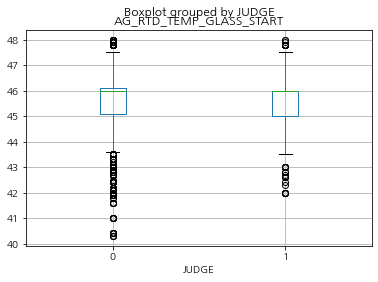

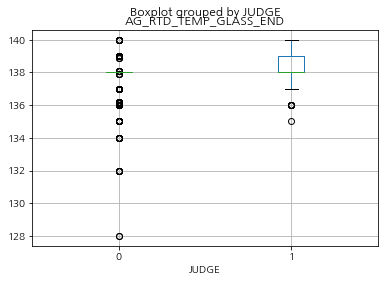

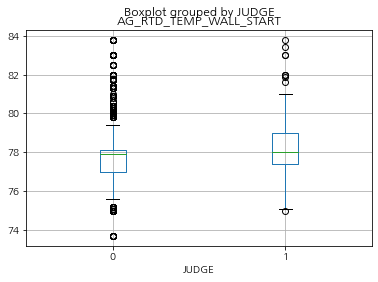

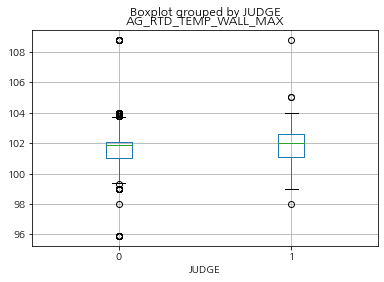

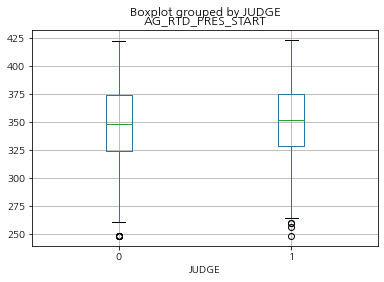

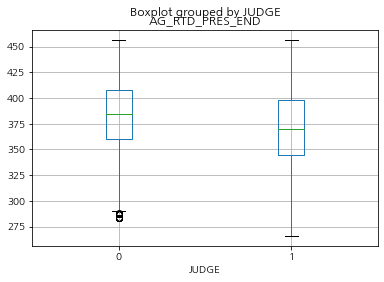

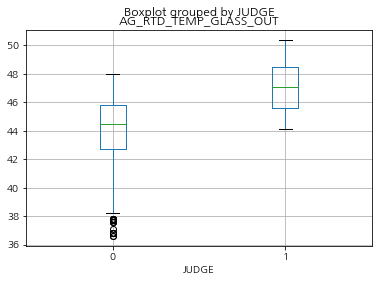

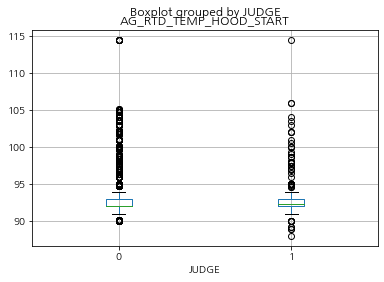

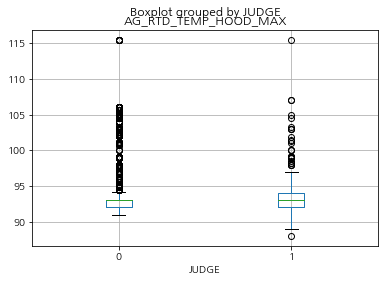

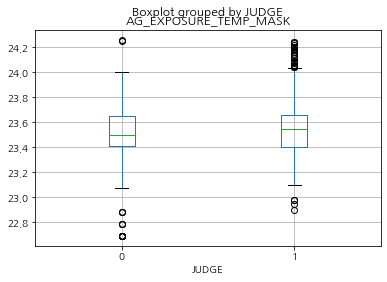

In [16]:
AG=['AG_RTD_TEMP_GLASS_START',
'AG_RTD_TEMP_GLASS_END',
'AG_RTD_TEMP_WALL_START',
'AG_RTD_TEMP_WALL_MAX',
'AG_RTD_PRES_START',
'AG_RTD_PRES_END',
'AG_RTD_TEMP_GLASS_OUT',
'AG_RTD_TEMP_HOOD_START',
'AG_RTD_TEMP_HOOD_MAX',
'AG_EXPOSURE_TEMP_MASK'
]
for col in AG:
    df.boxplot(column =col ,by = "JUDGE")
## AG_RTD_PRES_START 260이하 온도이상치 확인하기 이상없음
## AG_RTD_TEMP_HOOD_START 110도 이상온도 확인하기 이상 없음
## AG_RTD_TEMP_HOOD_MAX 90도이하 불량 데이터 확인하기 이상 없음

## Process_BUS 온도별 이상치 확인

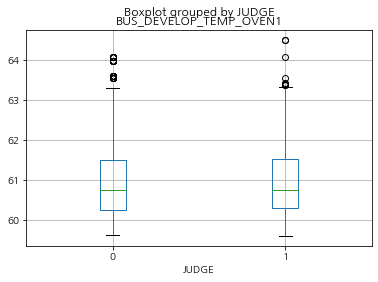

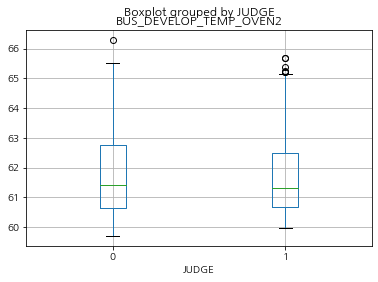

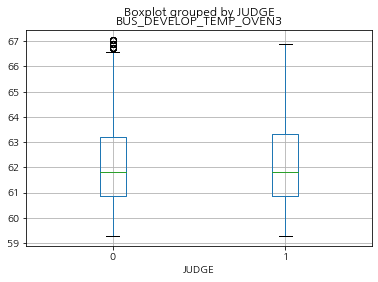

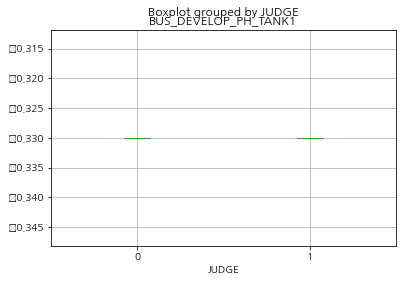

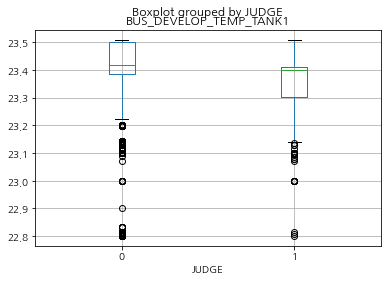

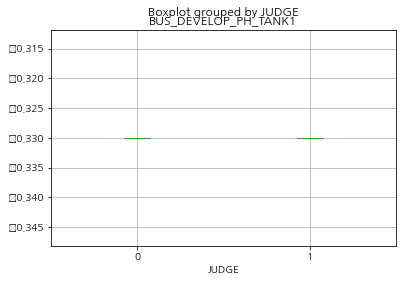

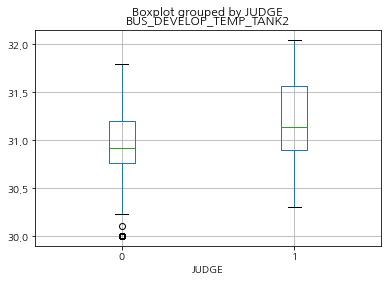

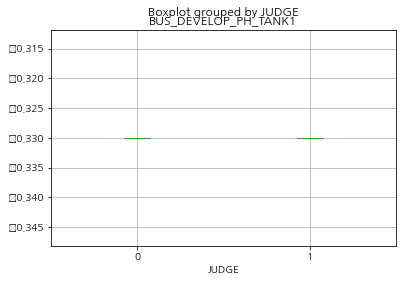

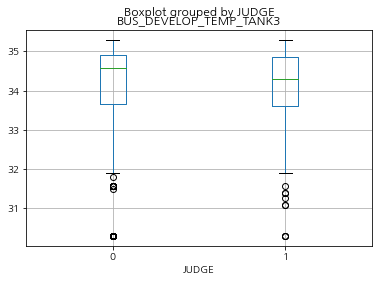

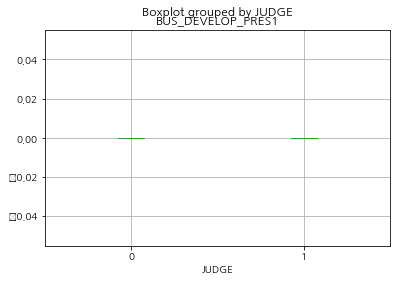

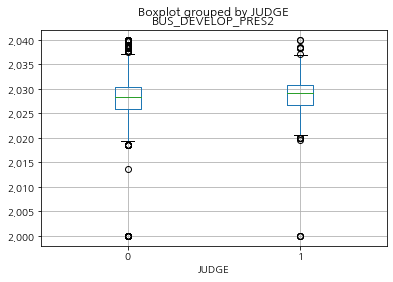

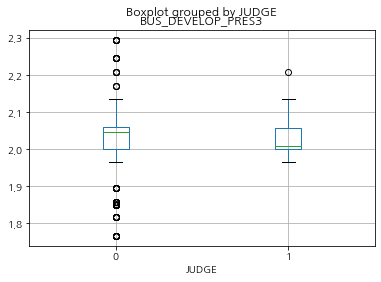

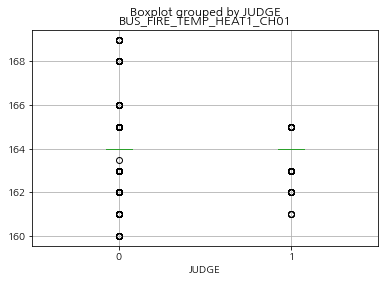

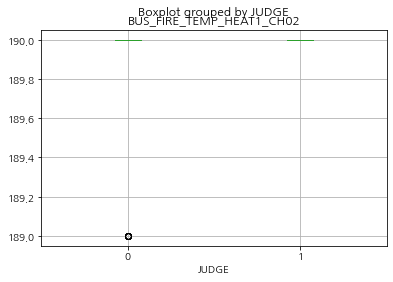

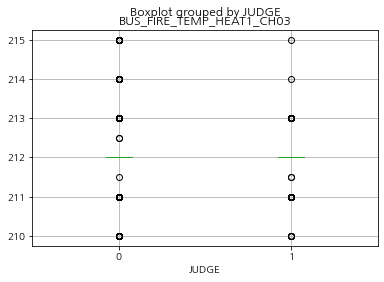

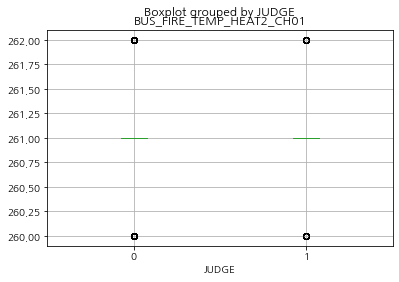

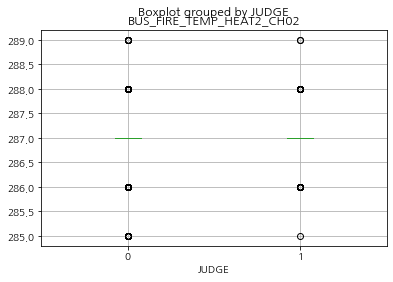

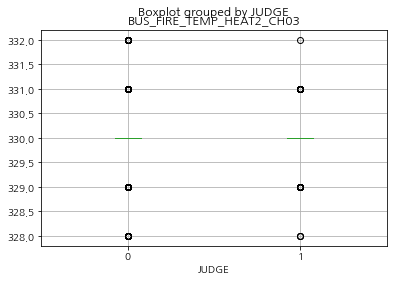

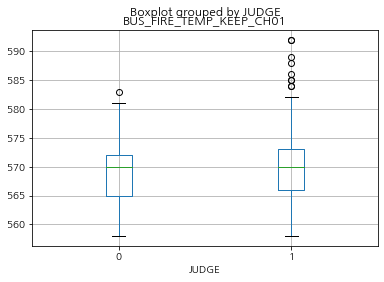

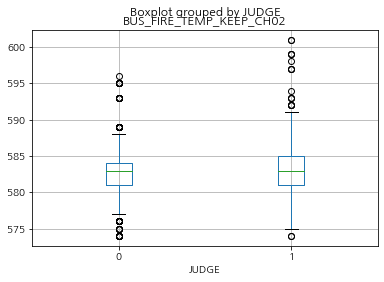

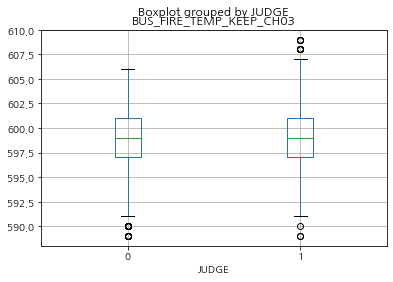

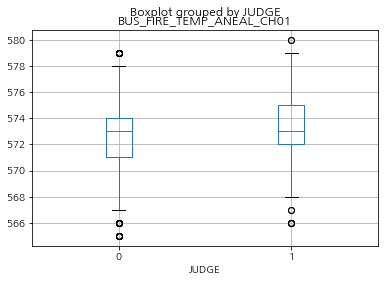

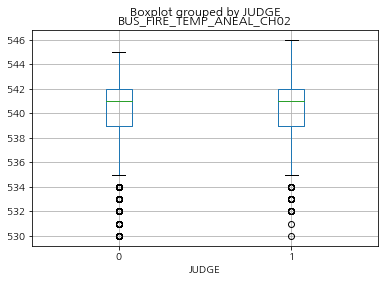

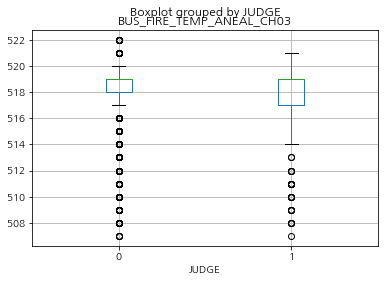

In [17]:
BUS=['BUS_DEVELOP_TEMP_OVEN1',
'BUS_DEVELOP_TEMP_OVEN2',
'BUS_DEVELOP_TEMP_OVEN3', 
'BUS_DEVELOP_PH_TANK1',
'BUS_DEVELOP_TEMP_TANK1',
'BUS_DEVELOP_PH_TANK1',
'BUS_DEVELOP_TEMP_TANK2',
'BUS_DEVELOP_PH_TANK1',
'BUS_DEVELOP_TEMP_TANK3',
'BUS_DEVELOP_PRES1',
'BUS_DEVELOP_PRES2',
'BUS_DEVELOP_PRES3',
'BUS_FIRE_TEMP_HEAT1_CH01',
'BUS_FIRE_TEMP_HEAT1_CH02',
'BUS_FIRE_TEMP_HEAT1_CH03',
'BUS_FIRE_TEMP_HEAT2_CH01',
'BUS_FIRE_TEMP_HEAT2_CH02',
'BUS_FIRE_TEMP_HEAT2_CH03',
'BUS_FIRE_TEMP_KEEP_CH01',
'BUS_FIRE_TEMP_KEEP_CH02',
'BUS_FIRE_TEMP_KEEP_CH03',
'BUS_FIRE_TEMP_ANEAL_CH01',
'BUS_FIRE_TEMP_ANEAL_CH02',
'BUS_FIRE_TEMP_ANEAL_CH03',

]
for col in BUS:
    df.boxplot(column =col ,by = "JUDGE")
# BUS_DEVELOP_TEMP_OVEN3 온도 66 이상의 양품 데이터 확인하기

## Process_DIELEC 온도별 이상치 확인

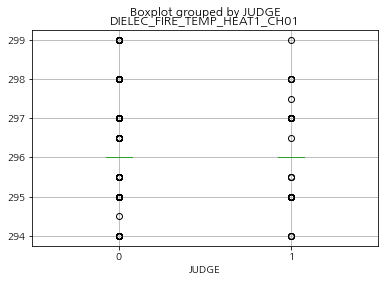

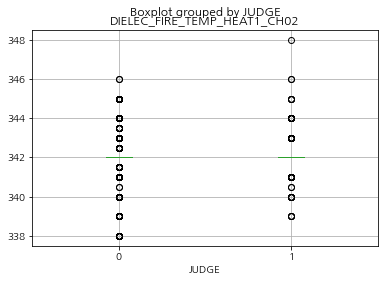

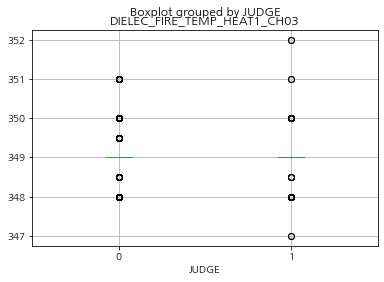

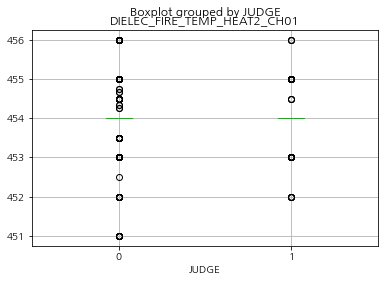

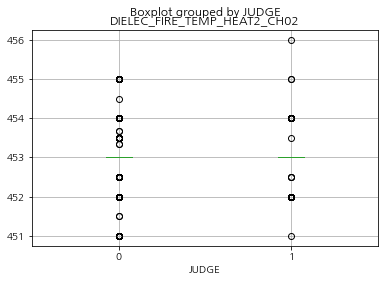

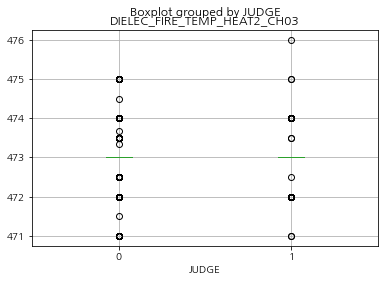

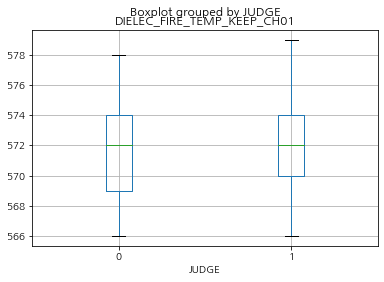

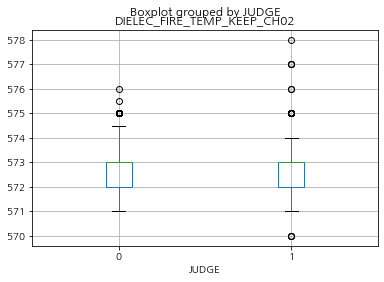

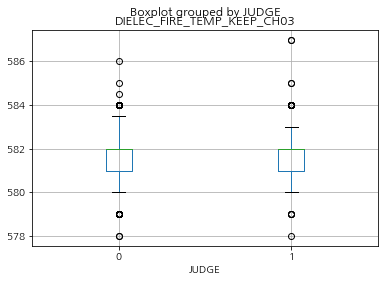

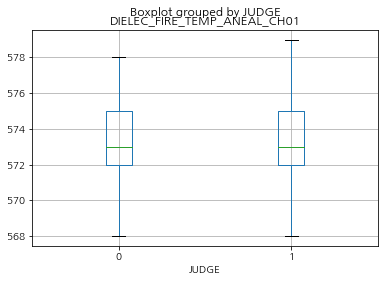

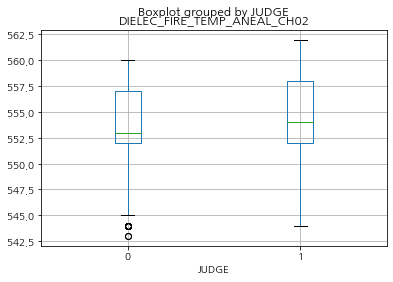

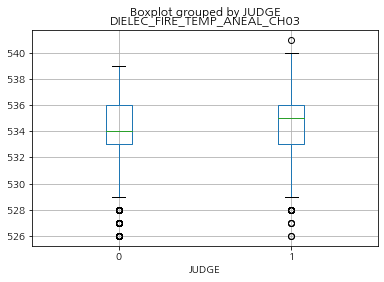

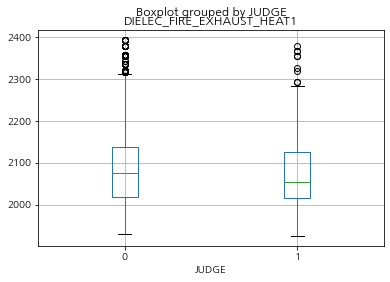

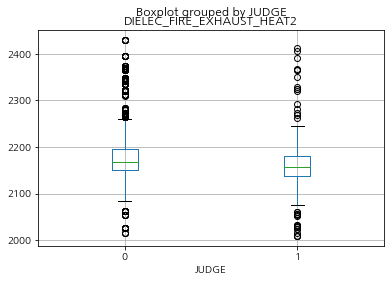

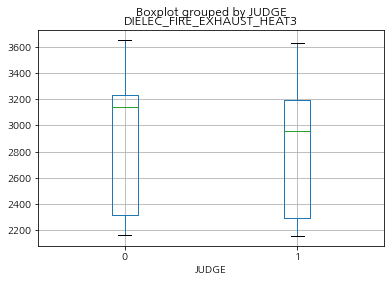

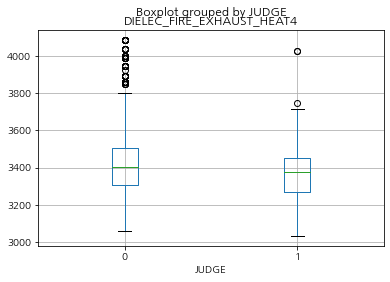

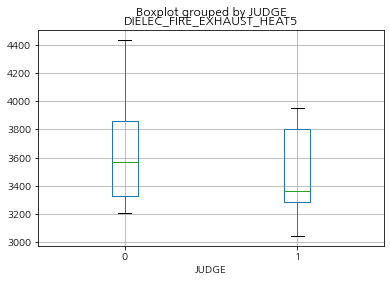

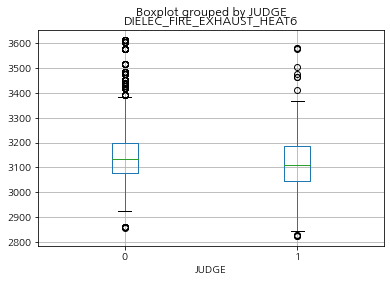

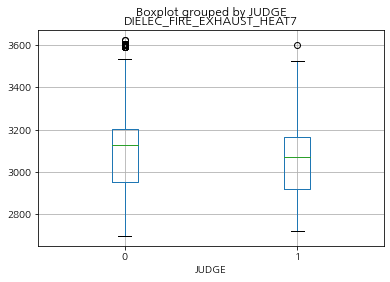

In [18]:
DIELEC=['DIELEC_FIRE_TEMP_HEAT1_CH01',
'DIELEC_FIRE_TEMP_HEAT1_CH02',
'DIELEC_FIRE_TEMP_HEAT1_CH03',
'DIELEC_FIRE_TEMP_HEAT2_CH01',
'DIELEC_FIRE_TEMP_HEAT2_CH02',
'DIELEC_FIRE_TEMP_HEAT2_CH03',
'DIELEC_FIRE_TEMP_KEEP_CH01',
'DIELEC_FIRE_TEMP_KEEP_CH02',
'DIELEC_FIRE_TEMP_KEEP_CH03',
'DIELEC_FIRE_TEMP_ANEAL_CH01',
'DIELEC_FIRE_TEMP_ANEAL_CH02',
'DIELEC_FIRE_TEMP_ANEAL_CH03',# 불량 데이터 540도 이상일 때 불량데이터 5개(343,2422,2959,3284,3998)
'DIELEC_FIRE_EXHAUST_HEAT1',
'DIELEC_FIRE_EXHAUST_HEAT2',
'DIELEC_FIRE_EXHAUST_HEAT3',
'DIELEC_FIRE_EXHAUST_HEAT4',
'DIELEC_FIRE_EXHAUST_HEAT5',
'DIELEC_FIRE_EXHAUST_HEAT6',
'DIELEC_FIRE_EXHAUST_HEAT7',

]
for col in DIELEC:
    df.boxplot(column =col ,by = "JUDGE")
# BUS_DEVELOP_TEMP_OVEN3 온도 66 이상의 양품 데이터 확인하기

## Process_PHOS_DRY온도별 이상치 확인

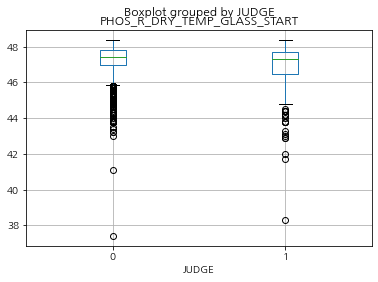

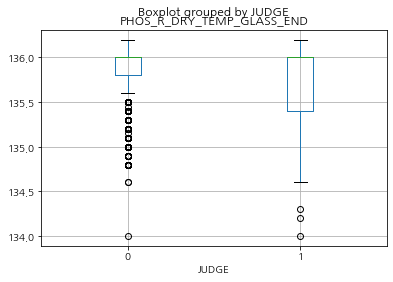

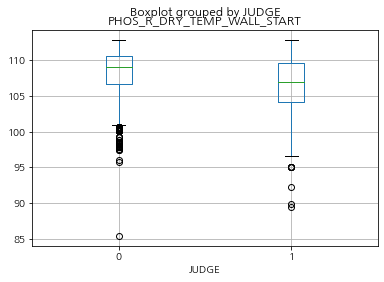

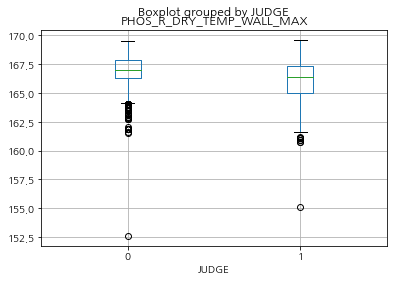

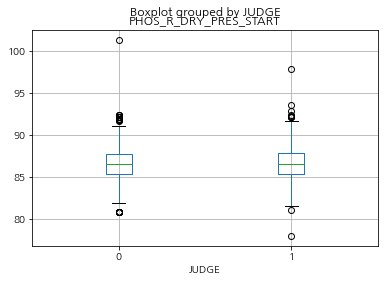

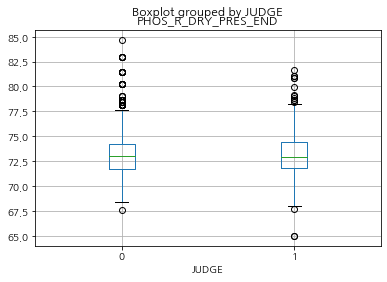

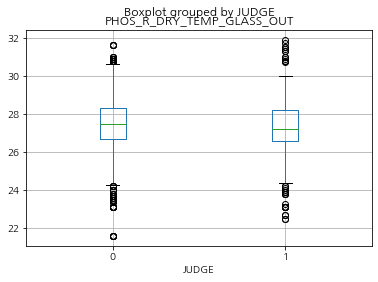

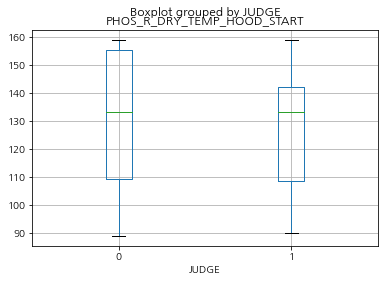

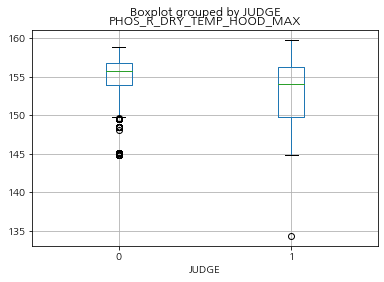

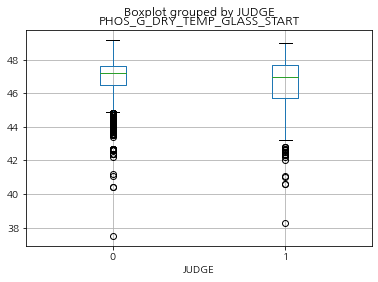

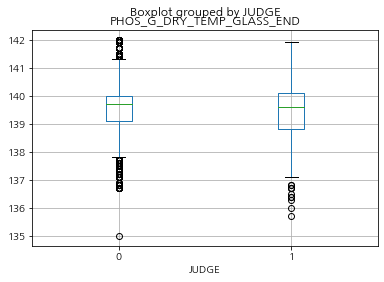

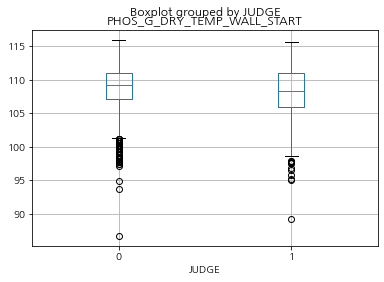

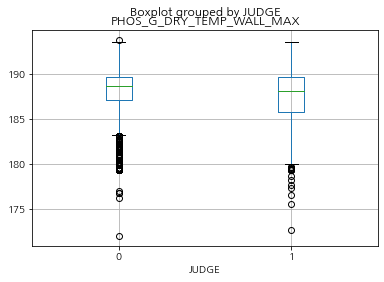

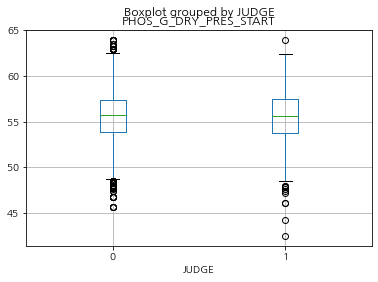

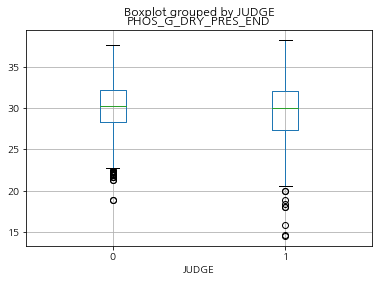

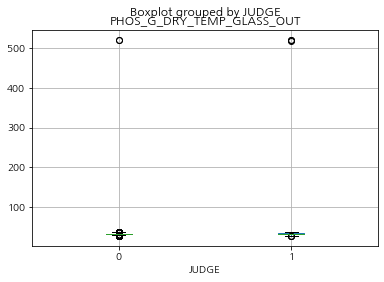

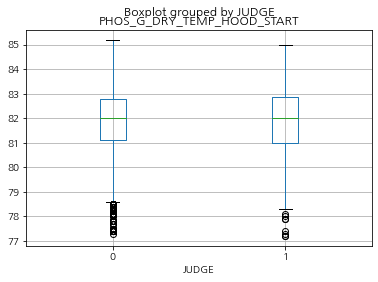

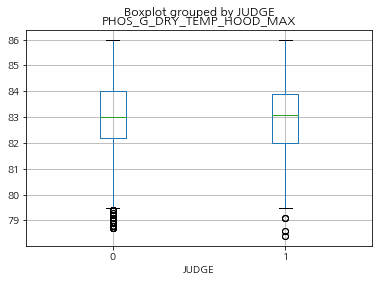

In [19]:
PHOS_DRY=['PHOS_R_DRY_TEMP_GLASS_START',
'PHOS_R_DRY_TEMP_GLASS_END',
'PHOS_R_DRY_TEMP_WALL_START',
'PHOS_R_DRY_TEMP_WALL_MAX',
'PHOS_R_DRY_PRES_START',
'PHOS_R_DRY_PRES_END',
'PHOS_R_DRY_TEMP_GLASS_OUT',
'PHOS_R_DRY_TEMP_HOOD_START',
'PHOS_R_DRY_TEMP_HOOD_MAX',
'PHOS_G_DRY_TEMP_GLASS_START',
'PHOS_G_DRY_TEMP_GLASS_END',
'PHOS_G_DRY_TEMP_WALL_START',
'PHOS_G_DRY_TEMP_WALL_MAX',
'PHOS_G_DRY_PRES_START',
'PHOS_G_DRY_PRES_END',
'PHOS_G_DRY_TEMP_GLASS_OUT',
'PHOS_G_DRY_TEMP_HOOD_START',
'PHOS_G_DRY_TEMP_HOOD_MAX',


]
for col in PHOS_DRY:
    df.boxplot(column =col ,by = "JUDGE")

# LOT별 불량률 MACHINE 데이터 불러오기

In [19]:
df_lot = pd.read_csv('/home/piai/Downloads/mfg_df_ratio_machine2.csv',encoding='cp949')
df_lot

LOT_ID  명점  양품   불량률 MC_1BLACK_1PRINT MC_1BLACK_2RTD MC_2AG_1PRINT  \
0    LOT-101   2  18  0.10              2호기            2호기           1호기   
1    LOT-102   1  19  0.05              1호기            1호기           2호기   
2    LOT-103   3  17  0.15              2호기            2호기           1호기   
3    LOT-104   0  20  0.00              1호기            1호기           2호기   
4    LOT-105   2  18  0.10              2호기            1호기           1호기   
..       ...  ..  ..   ...              ...            ...           ...   
195  LOT-296   3  17  0.15              2호기            1호기           2호기   
196  LOT-297   2  18  0.10              1호기            2호기           1호기   
197  LOT-298   4  16  0.20              2호기            2호기           2호기   
198  LOT-299   4  16  0.20              1호기            1호기           2호기   
199  LOT-300   3  17  0.15              2호기            1호기           1호기   

    MC_2AG_2RTD MC_2AG_3EXPOSURE MC_3BUS_1DEVELOP  ... MC_4DIELEC_1FIRE  \
0           1호기              2호기              1호기  ...              3호기   
1           1호기              2호기              1호기  ...              3호기   
2           1호기              2호기              2호기  ...              2호기   
3           2호기              1호기              2호기  ...              3호기   
4           1호기              1호기              1호기  ...              1호기   
..          ...              ...              ...  ...              ...   
195         1호기              2호기              2호기  ...              3호기   
196         2호기              2호기              1호기  ...              3호기   
197         2호기              1호기              2호기  ...              2호기   
198         2호기              2호기              1호기  ...              1호기   
199         1호기              1호기              2호기  ...              3호기   

    MC_5MGO MC_6PHOS_1R_1DISPENSER MC_6PHOS_1R_2DRY MC_6PHOS_2G_1DISPENSER  \
0       1호기                    1호기              2호기                    2호기   
1       2호기                    1호기              2호기                    1호기   
2       2호기                    1호기              2호기                    1호기   
3       2호기                    1호기              2호기                    1호기   
4       2호기                    1호기              2호기                    1호기   
..      ...                    ...              ...                    ...   
195     1호기                    2호기              1호기                    2호기   
196     1호기                    1호기              1호기                    1호기   
197     1호기                    2호기              2호기                    2호기   
198     2호기                    1호기              1호기                    1호기   
199     2호기                    2호기              1호기                    2호기   

    MC_6PHOS_2G_2DRY MC_6PHOS_3B_1DISPENSER MC_6PHOS_4FIRE MC_7PASTE MC_8AGING  
0                2호기                    1호기            3호기       1호기       2호기  
1                1호기                    2호기            3호기       2호기       2호기  
2                2호기                    1호기            1호기       2호기       2호기  
3                1호기                    1호기            2호기       2호기       1호기  
4                2호기                    2호기            2호기       2호기       1호기  
..               ...                    ...            ...       ...       ...  
195              1호기                    2호기            3호기       1호기       1호기  
196              2호기                    1호기            2호기       2호기       1호기  
197              2호기                    1호기            3호기       2호기       1호기  
198              1호기                    1호기            2호기       1호기       2호기  
199              1호기                    1호기            3호기       1호기       2호기  

[200 rows x 21 columns]

## y= 불량률  설명변수 LOT_ID, 불량률,명점, 양품 제거

In [20]:
x=df_lot.drop(['LOT_ID','불량률','명점','양품'],axis=1)
y=df_lot[['불량률']]



## LOTID, 불량률, 명점,양품 데이터 제거한 데이터프레임 

In [21]:
df_lot_machine=df_lot[['불량률',
'MC_1BLACK_1PRINT',
'MC_1BLACK_2RTD',
'MC_2AG_1PRINT',
'MC_2AG_2RTD',
'MC_2AG_3EXPOSURE',
'MC_3BUS_1DEVELOP',
'MC_3BUS_2FIRE',
'MC_4DIELEC_1FIRE',
'MC_5MGO',
'MC_6PHOS_1R_1DISPENSER',
'MC_6PHOS_1R_2DRY',
'MC_6PHOS_2G_1DISPENSER',
'MC_6PHOS_2G_2DRY',
'MC_6PHOS_3B_1DISPENSER',
'MC_6PHOS_4FIRE',
'MC_7PASTE',
'MC_8AGING'
]]
df_lot_machine.head()

불량률 MC_1BLACK_1PRINT MC_1BLACK_2RTD MC_2AG_1PRINT MC_2AG_2RTD  \
0  0.10              2호기            2호기           1호기         1호기   
1  0.05              1호기            1호기           2호기         1호기   
2  0.15              2호기            2호기           1호기         1호기   
3  0.00              1호기            1호기           2호기         2호기   
4  0.10              2호기            1호기           1호기         1호기   

  MC_2AG_3EXPOSURE MC_3BUS_1DEVELOP MC_3BUS_2FIRE MC_4DIELEC_1FIRE MC_5MGO  \
0              2호기              1호기           1호기              3호기     1호기   
1              2호기              1호기           2호기              3호기     2호기   
2              2호기              2호기           2호기              2호기     2호기   
3              1호기              2호기           1호기              3호기     2호기   
4              1호기              1호기           1호기              1호기     2호기   

  MC_6PHOS_1R_1DISPENSER MC_6PHOS_1R_2DRY MC_6PHOS_2G_1DISPENSER  \
0                    1호기              2호기                    2호기   
1                    1호기              2호기                    1호기   
2                    1호기              2호기                    1호기   
3                    1호기              2호기                    1호기   
4                    1호기              2호기                    1호기   

  MC_6PHOS_2G_2DRY MC_6PHOS_3B_1DISPENSER MC_6PHOS_4FIRE MC_7PASTE MC_8AGING  
0              2호기                    1호기            3호기       1호기       2호기  
1              1호기                    2호기            3호기       2호기       2호기  
2              2호기                    1호기            1호기       2호기       2호기  
3              1호기                    1호기            2호기       2호기       1호기  
4              2호기                    2호기            2호기       2호기       1호기

## (생략)불량률 % 에서 숫자화

In [65]:
# for a in range(0,200):
#     if '%' in df_lot['불량률'][a][:2] :
#         df_lot['불량률'][a]=float(df_lot['불량률'][a][:1])/100
#     elif '%' in df_lot['불량률'][a][:3] :
#         df_lot['불량률'][a]=float(df_lot['불량률'][a][:2])/100

### 목표변수와 설명변수 설정 

In [23]:
x_dummy=pd.get_dummies(x)
y_dummy=pd.get_dummies(y)

In [ ]:
# params_grid = {'max_depth': [i for i in range(1,10)],
#              'min_samples_leaf' : [i*10 for i in range(1,10)],
#              'min_samples_split' : [i*2 for i in range(2,21)],
#               }

# grid_search = GridSearchCV(RFR(random_state = 2222), param_grid = params_grid)
# grid_search.fit(x_dummy,y_dummy)

# print("Best Score : {}".format(grid_search.best_score_))
# print("Best params : {}".format(grid_search.best_params_))

## 불량률 공정설비간 유의차 RANDOM FOREST 중요변수 확인하기

In [24]:
best_rf_model = RFR(min_samples_leaf = 50,max_depth= 5)
best_rf_model.fit(x_dummy,y_dummy)

RandomForestRegressor(max_depth=5, min_samples_leaf=50)

In [25]:
v_feature_name = x_dummy.columns

df_importance=pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance']=best_rf_model.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

Feature  Importance
6              MC_2AG_2RTD_1호기        0.29
10        MC_3BUS_1DEVELOP_1호기        0.14
25        MC_6PHOS_2G_2DRY_1호기        0.10
26        MC_6PHOS_2G_2DRY_2호기        0.10
7              MC_2AG_2RTD_2호기        0.07
11        MC_3BUS_1DEVELOP_2호기        0.06
23  MC_6PHOS_2G_1DISPENSER_1호기        0.04
3           MC_1BLACK_2RTD_2호기        0.03
13           MC_3BUS_2FIRE_2호기        0.03
35               MC_8AGING_2호기        0.02
16        MC_4DIELEC_1FIRE_3호기        0.02
21        MC_6PHOS_1R_2DRY_1호기        0.02
31          MC_6PHOS_4FIRE_3호기        0.01
33               MC_7PASTE_2호기        0.01
24  MC_6PHOS_2G_1DISPENSER_2호기        0.01
34               MC_8AGING_1호기        0.01
27  MC_6PHOS_3B_1DISPENSER_1호기        0.01
18                 MC_5MGO_2호기        0.01
17                 MC_5MGO_1호기        0.01
12           MC_3BUS_2FIRE_1호기        0.01
1         MC_1BLACK_1PRINT_2호기        0.00
28  MC_6PHOS_3B_1DISPENSER_2호기        0.00
2           MC_1BLACK_2RTD_1호기        0.00
4            MC_2AG_1PRINT_1호기        0.00
32               MC_7PASTE_1호기        0.00
5            MC_2AG_1PRINT_2호기        0.00
30          MC_6PHOS_4FIRE_2호기        0.00
29          MC_6PHOS_4FIRE_1호기        0.00
8         MC_2AG_3EXPOSURE_1호기        0.00
19  MC_6PHOS_1R_1DISPENSER_1호기        0.00
9         MC_2AG_3EXPOSURE_2호기        0.00
14        MC_4DIELEC_1FIRE_1호기        0.00
15        MC_4DIELEC_1FIRE_2호기        0.00
22        MC_6PHOS_1R_2DRY_2호기        0.00
20  MC_6PHOS_1R_1DISPENSER_2호기        0.00
0         MC_1BLACK_1PRINT_1호기        0.00

## 불량률 공정설비간 유의차 ANOVA 중요변수 확인하기

In [72]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
df_anova = ['MC_1BLACK_1PRINT',
'MC_1BLACK_2RTD',
'MC_2AG_1PRINT',
'MC_2AG_2RTD',
'MC_2AG_3EXPOSURE',
'MC_3BUS_1DEVELOP',
'MC_3BUS_2FIRE',
'MC_4DIELEC_1FIRE',
'MC_5MGO',
'MC_6PHOS_1R_1DISPENSER',
'MC_6PHOS_1R_2DRY',
'MC_6PHOS_2G_1DISPENSER',
'MC_6PHOS_2G_2DRY',
'MC_6PHOS_3B_1DISPENSER',
'MC_6PHOS_4FIRE',
'MC_7PASTE',
'MC_8AGING']

    
for i in df_anova :
    model = ols('불량률 ~ C(%s)'%i, df).fit()
    print(anova_lm(model))
    print()

                        df    sum_sq   mean_sq         F    PR(>F)
C(MC_1BLACK_1PRINT)    1.0  0.000645  0.000645  0.173095  0.677826
Residual             198.0  0.737743  0.003726       NaN       NaN

                      df    sum_sq   mean_sq         F    PR(>F)
C(MC_1BLACK_2RTD)    1.0  0.002273  0.002273  0.611384  0.435201
Residual           198.0  0.736115  0.003718       NaN       NaN

                     df    sum_sq   mean_sq         F    PR(>F)
C(MC_2AG_1PRINT)    1.0  0.000953  0.000953  0.255814  0.613574
Residual          198.0  0.737435  0.003724       NaN       NaN

                   df    sum_sq   mean_sq         F    PR(>F)
C(MC_2AG_2RTD)    1.0  0.025034  0.025034  6.948446  0.009054
Residual        198.0  0.713354  0.003603       NaN       NaN

                        df    sum_sq   mean_sq         F    PR(>F)
C(MC_2AG_3EXPOSURE)    1.0  0.000566  0.000566  0.151949  0.697099
Residual             198.0  0.737821  0.003726       NaN       NaN

                    

### 카이제곱 검정을 통한 공정설비간 유의차 확인하기

In [82]:
# 데이터 불러오기
df_machine = pd.read_csv('/home/piai/Desktop/POSCO_Ai-BigData_academy/Week4_BigData_Project/Data/원본데이터/MFG_MACHINE.csv', engine='python', encoding='cp949')
df_machine.head()

JUDGE   LOT_ID PANEL_ID      TIME_1BLACK         TIME_2AG         TIME_3BUS      TIME_4DIELEC        TIME_5MGO        TIME_6PHOS       TIME_7PASTE       TIME_8AGING MC_1BLACK_1PRINT MC_1BLACK_2RTD MC_2AG_1PRINT MC_2AG_2RTD MC_2AG_3EXPOSURE MC_3BUS_1DEVELOP MC_3BUS_2FIRE MC_4DIELEC_1FIRE MC_5MGO MC_6PHOS_1R_1DISPENSER MC_6PHOS_1R_2DRY MC_6PHOS_2G_1DISPENSER MC_6PHOS_2G_2DRY MC_6PHOS_3B_1DISPENSER MC_6PHOS_4FIRE MC_7PASTE MC_8AGING
0    양품  LOT-101   PNL-01  2019-04-01 0:01  2019-04-01 5:21  2019-04-01 11:01  2019-04-06 13:41  2019-04-11 3:41  2019-04-03 20:20  2019-04-11 12:41  2019-04-11 14:21              2호기            2호기           1호기         1호기              2호기              1호기           1호기              3호기     1호기                    1호기              2호기                    2호기              2호기                    1호기            3호기       1호기       2호기
1    양품  LOT-101   PNL-02  2019-04-01 0:45  2019-04-01 6:05  2019-04-01 11:45  2019-04-06 14:25  2019-04-11 4:25  2019-04-03 21:04  2019-04-11 13:25  2019-04-11 15:05              2호기            2호기           1호기         1호기              2호기              1호기           1호기              3호기     1호기                    1호기              2호기                    2호기              2호기                    1호기            3호기       1호기       2호기
2    양품  LOT-101   PNL-03  2019-04-01 1:29  2019-04-01 6:49  2019-04-01 12:29  2019-04-06 15:09  2019-04-11 5:09  2019-04-03 21:48  2019-04-11 14:09  2019-04-11 15:49              2호기            2호기           1호기         1호기              2호기              1호기           1호기              3호기     1호기                    1호기              2호기                    2호기              2호기                    1호기            3호기       1호기       2호기
3    양품  LOT-101   PNL-04  2019-04-01 2:13  2019-04-01 7:33  2019-04-01 13:13  2019-04-06 15:53  2019-04-11 5:53  2019-04-03 22:32  2019-04-11 14:53  2019-04-11 16:33              2호기            2호기           1호기         1호기              2호기              1호기           1호기              3호기     1호기                    1호기              2호기                    2호기              2호기                    1호기            3호기       1호기       2호기
4    양품  LOT-101   PNL-05  2019-04-01 2:58  2019-04-01 8:18  2019-04-01 13:58  2019-04-06 16:38  2019-04-11 6:38  2019-04-03 23:17  2019-04-11 15:38  2019-04-11 17:18              2호기            2호기           1호기         1호기              2호기              1호기           1호기              3호기     1호기                    1호기              2호기                    2호기              2호기                    1호기            3호기       1호기       2호기

In [84]:
# 크로스탭 함수
def fun_print_crosstab(data, var):
    print(pd.crosstab(index = data['JUDGE'], columns = data[var]))
    print()
    print(pd.crosstab(index = data['JUDGE'],columns = data[var], normalize ='columns').round(3))

# 데이터 불러오기
df_list = ['MC_1BLACK_1PRINT',
'MC_1BLACK_2RTD',
'MC_2AG_1PRINT',
'MC_2AG_2RTD',
'MC_2AG_3EXPOSURE',
'MC_3BUS_1DEVELOP',
'MC_3BUS_2FIRE',
'MC_4DIELEC_1FIRE',
'MC_5MGO',
'MC_6PHOS_1R_1DISPENSER',
'MC_6PHOS_1R_2DRY',
'MC_6PHOS_2G_1DISPENSER',
'MC_6PHOS_2G_2DRY',
'MC_6PHOS_3B_1DISPENSER',
'MC_6PHOS_4FIRE',
'MC_7PASTE',
'MC_8AGING'
]

for i in df_list :
    result = pd.crosstab(df_machine[i], df_machine['JUDGE'])
    chi, pval, dof, expected = stats.chi2_contingency(observed = result)
    print('%s 카이제곱 검정 p : %s' %(i, pval.round(3)))

MC_1BLACK_1PRINT 카이제곱 검정 p : 0.752
MC_1BLACK_2RTD 카이제곱 검정 p : 0.523
MC_2AG_1PRINT 카이제곱 검정 p : 0.692
MC_2AG_2RTD 카이제곱 검정 p : 0.025
MC_2AG_3EXPOSURE 카이제곱 검정 p : 0.769
MC_3BUS_1DEVELOP 카이제곱 검정 p : 0.061
MC_3BUS_2FIRE 카이제곱 검정 p : 0.343
MC_4DIELEC_1FIRE 카이제곱 검정 p : 0.003
MC_5MGO 카이제곱 검정 p : 0.272
MC_6PHOS_1R_1DISPENSER 카이제곱 검정 p : 0.806
MC_6PHOS_1R_2DRY 카이제곱 검정 p : 0.307
MC_6PHOS_2G_1DISPENSER 카이제곱 검정 p : 0.346
MC_6PHOS_2G_2DRY 카이제곱 검정 p : 0.067
MC_6PHOS_3B_1DISPENSER 카이제곱 검정 p : 0.494
MC_6PHOS_4FIRE 카이제곱 검정 p : 0.065
MC_7PASTE 카이제곱 검정 p : 0.73
MC_8AGING 카이제곱 검정 p : 0.494


### Gradient Boosting 을 통한 공정설비간 유의 확인하기

In [85]:
from sklearn.ensemble import GradientBoostingRegressor as GBR

df_raw_x = df_lot_machine.drop('불량률', axis=1, inplace=False)
df_raw_y = df_lot_machine['불량률']

df_raw_x_dummy = pd.get_dummies(df_raw_x)

# 최종 모델
gb_final = GBR(random_state=1234,
n_estimators=50,
max_depth=4,
min_samples_split=10,
min_samples_leaf=10,
learning_rate=.1
)
gb_final.fit(df_raw_x_dummy, df_raw_y)

# 설명변수 중요도 확인 및 테이블로 저장
v_feature_name = df_raw_x_dummy.columns

df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = gb_final.feature_importances_

# 중요도 순으로 정렬
df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)

Accuracy on training set : 0.703
Accuracy on test set : 0.703


Feature  Importance
16        MC_4DIELEC_1FIRE_3호기       0.092
6              MC_2AG_2RTD_1호기       0.041
26        MC_6PHOS_2G_2DRY_2호기       0.041
10        MC_3BUS_1DEVELOP_1호기       0.038
29          MC_6PHOS_4FIRE_1호기       0.038
25        MC_6PHOS_2G_2DRY_1호기       0.037
15        MC_4DIELEC_1FIRE_2호기       0.036
22        MC_6PHOS_1R_2DRY_2호기       0.036
17                 MC_5MGO_1호기       0.036
11        MC_3BUS_1DEVELOP_2호기       0.035
3           MC_1BLACK_2RTD_2호기       0.034
32               MC_7PASTE_1호기       0.034
7              MC_2AG_2RTD_2호기       0.034
21        MC_6PHOS_1R_2DRY_1호기       0.033
19  MC_6PHOS_1R_1DISPENSER_1호기       0.033
20  MC_6PHOS_1R_1DISPENSER_2호기       0.030
1         MC_1BLACK_1PRINT_2호기       0.028
0         MC_1BLACK_1PRINT_1호기       0.028
12           MC_3BUS_2FIRE_1호기       0.027
4            MC_2AG_1PRINT_1호기       0.027
33               MC_7PASTE_2호기       0.026
14        MC_4DIELEC_1FIRE_1호기       0.025
27  MC_6PHOS_3B_1DISPENSER_1호기       0.022
18                 MC_5MGO_2호기       0.021
13           MC_3BUS_2FIRE_2호기       0.021
28  MC_6PHOS_3B_1DISPENSER_2호기       0.019
2           MC_1BLACK_2RTD_1호기       0.018
24  MC_6PHOS_2G_1DISPENSER_2호기       0.016
5            MC_2AG_1PRINT_2호기       0.015
23  MC_6PHOS_2G_1DISPENSER_1호기       0.014
35               MC_8AGING_2호기       0.014
30          MC_6PHOS_4FIRE_2호기       0.013
9         MC_2AG_3EXPOSURE_2호기       0.013
34               MC_8AGING_1호기       0.010
8         MC_2AG_3EXPOSURE_1호기       0.010
31          MC_6PHOS_4FIRE_3호기       0.006

### Decision Tree 을 통한 공정설비간 유의 확인하기

In [27]:

#최종모델
tree_final = DTR(random_state = 1234, max_depth = 4)
tree_final.fit(x_dummy,y_dummy)


#tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance7 = df_importance[:10]
df_importance7.round(4)


#설명변수 중요도 그래프
#중요도가 높은 변수를 상위에 그림
df_importance7.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance7))
plt.barh(y= coordinates, width =df_importance7["Importance"])
plt.yticks(coordinates, df_importance7["Feature"])
plt.xlabel("Variable Importance")
plt.ylabel("Variable")

KeyError: "None of [Index(['불량률', 'MC_1BLACK_1PRINT', 'MC_1BLACK_2RTD', 'MC_2AG_1PRINT',\n       'MC_2AG_2RTD', 'MC_2AG_3EXPOSURE', 'MC_3BUS_1DEVELOP', 'MC_3BUS_2FIRE',\n       'MC_4DIELEC_1FIRE', 'MC_5MGO', 'MC_6PHOS_1R_1DISPENSER',\n       'MC_6PHOS_1R_2DRY', 'MC_6PHOS_2G_1DISPENSER', 'MC_6PHOS_2G_2DRY',\n       'MC_6PHOS_3B_1DISPENSER', 'MC_6PHOS_4FIRE', 'MC_7PASTE', 'MC_8AGING'],\n      dtype='object')] are in the [columns]"

### Process 파라미터 간 유의차 분석 Decision Tree

In [87]:
df= pd.read_csv("/home/piai/Desktop/POSCO_Ai-BigData_academy/Week4_BigData_Project/Data/Data결측치제거Merge/MFG_ALL_NULLOUT.csv", encoding="cp949")
df.head()

df_prss = df.iloc[:, 45:]
df_prss

df_prss.shape
df_y=df[["JUDGE"]]

#최종모델
tree_final = DecisionTreeClassifier(random_state = 1234, max_depth = 4)
tree_final.fit(df_prss,df_y)

# 설명변수 중요도 확인 및 테이블로 저장
v_feature_name = df_prss.columns

df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

# 중요도 순으로 정렬
df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)

Feature  Importance
15        AG_RTD_TEMP_GLASS_OUT       0.644
25       BUS_DEVELOP_TEMP_TANK2       0.280
23       BUS_DEVELOP_TEMP_TANK1       0.043
18        AG_EXPOSURE_TEMP_MASK       0.029
49   DIELEC_FIRE_TEMP_KEEP_CH01       0.005
91    PHOS_FIRE_TEMP_ANEAL_CH04       0.000
72    PHOS_G_DRY_TEMP_GLASS_END       0.000
70     PHOS_R_DRY_TEMP_HOOD_MAX       0.000
69   PHOS_R_DRY_TEMP_HOOD_START       0.000
68    PHOS_R_DRY_TEMP_GLASS_OUT       0.000
67          PHOS_R_DRY_PRES_END       0.000
66        PHOS_R_DRY_PRES_START       0.000
65     PHOS_R_DRY_TEMP_WALL_MAX       0.000
64   PHOS_R_DRY_TEMP_WALL_START       0.000
63    PHOS_R_DRY_TEMP_GLASS_END       0.000
62  PHOS_R_DRY_TEMP_GLASS_START       0.000
61    DIELEC_FIRE_EXHAUST_HEAT7       0.000
60    DIELEC_FIRE_EXHAUST_HEAT6       0.000
59    DIELEC_FIRE_EXHAUST_HEAT5       0.000
58    DIELEC_FIRE_EXHAUST_HEAT4       0.000
57    DIELEC_FIRE_EXHAUST_HEAT3       0.000
56    DIELEC_FIRE_EXHAUST_HEAT2       0.000
55    DIELEC_FIRE_EXHAUST_HEAT1       0.000
54  DIELEC_FIRE_TEMP_ANEAL_CH03       0.000
53  DIELEC_FIRE_TEMP_ANEAL_CH02       0.000
52  DIELEC_FIRE_TEMP_ANEAL_CH01       0.000
71  PHOS_G_DRY_TEMP_GLASS_START       0.000
73   PHOS_G_DRY_TEMP_WALL_START       0.000
90    PHOS_FIRE_TEMP_ANEAL_CH03       0.000
74     PHOS_G_DRY_TEMP_WALL_MAX       0.000
89    PHOS_FIRE_TEMP_ANEAL_CH02       0.000
88    PHOS_FIRE_TEMP_ANEAL_CH01       0.000
87     PHOS_FIRE_TEMP_KEEP_CH04       0.000
86     PHOS_FIRE_TEMP_KEEP_CH03       0.000
85     PHOS_FIRE_TEMP_KEEP_CH02       0.000
84     PHOS_FIRE_TEMP_KEEP_CH01       0.000
83     PHOS_FIRE_TEMP_HEAT_CH04       0.000
82     PHOS_FIRE_TEMP_HEAT_CH03       0.000
92      PHOS_FIRE_EXHAUST_HEAT1       0.000
81     PHOS_FIRE_TEMP_HEAT_CH02       0.000
80     PHOS_FIRE_TEMP_HEAT_CH01       0.000
93      PHOS_FIRE_EXHAUST_HEAT2       0.000
79     PHOS_G_DRY_TEMP_HOOD_MAX       0.000
78   PHOS_G_DRY_TEMP_HOOD_START       0.000
77    PHOS_G_DRY_TEMP_GLASS_OUT       0.000
76          PHOS_G_DRY_PRES_END       0.000
94      PHOS_FIRE_EXHAUST_HEAT3       0.000
75        PHOS_G_DRY_PRES_START       0.000
51   DIELEC_FIRE_TEMP_KEEP_CH03       0.000
0    BLACK_RTD_TEMP_GLASS_START       0.000
48  DIELEC_FIRE_TEMP_HEAT2_CH03       0.000
50   DIELEC_FIRE_TEMP_KEEP_CH02       0.000
26       BUS_DEVELOP_PH_TANK1 3       0.000
22         BUS_DEVELOP_PH_TANK1       0.000
21       BUS_DEVELOP_TEMP_OVEN3       0.000
20       BUS_DEVELOP_TEMP_OVEN2       0.000
19       BUS_DEVELOP_TEMP_OVEN1       0.000
17         AG_RTD_TEMP_HOOD_MAX       0.000
16       AG_RTD_TEMP_HOOD_START       0.000
14              AG_RTD_PRES_END       0.000
13            AG_RTD_PRES_START       0.000
12         AG_RTD_TEMP_WALL_MAX       0.000
11       AG_RTD_TEMP_WALL_START       0.000
10        AG_RTD_TEMP_GLASS_END       0.000
9       AG_RTD_TEMP_GLASS_START       0.000
8       BLACK_RTD_TEMP_HOOD_MAX       0.000
7     BLACK_RTD_TEMP_HOOD_START       0.000
6      BLACK_RTD_TEMP_GLASS_OUT       0.000
5            BLACK_RTD_PRES_END       0.000
4          BLACK_RTD_PRES_START       0.000
3       BLACK_RTD_TEMP_WALL_MAX       0.000
2     BLACK_RTD_TEMP_WALL_START       0.000
24       BUS_DEVELOP_PH_TANK1 2       0.000
27       BUS_DEVELOP_TEMP_TANK3       0.000
1      BLACK_RTD_TEMP_GLASS_END       0.000
28            BUS_DEVELOP_PRES1       0.000
47  DIELEC_FIRE_TEMP_HEAT2_CH02       0.000
46  DIELEC_FIRE_TEMP_HEAT2_CH01       0.000
45  DIELEC_FIRE_TEMP_HEAT1_CH03       0.000
44  DIELEC_FIRE_TEMP_HEAT1_CH02       0.000
43  DIELEC_FIRE_TEMP_HEAT1_CH01       0.000
42     BUS_FIRE_TEMP_ANEAL_CH03       0.000
41     BUS_FIRE_TEMP_ANEAL_CH02       0.000
40     BUS_FIRE_TEMP_ANEAL_CH01       0.000
39      BUS_FIRE_TEMP_KEEP_CH03       0.000
38      BUS_FIRE_TEMP_KEEP_CH02       0.000
37      BUS_FIRE_TEMP_KEEP_CH01       0.000
36     BUS_FIRE_TEMP_HEAT2_CH03       0.000
35     BUS_FIRE_TEMP_HEAT2_CH02       0.000
34     BUS_FIRE_TEMP_HEAT2_CH01       0.000
33     BUS_FIRE_TEMP

## d

### 월별 명점 불량률 증가 추이

shape : (123, 4)


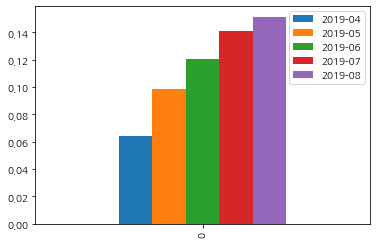

In [88]:
# 월별 불량률 계산

from datetime import datetime

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.arima_model import ARIMA

# 데이터 불러오기
df_raw = pd.read_csv('/home/piai/Desktop/POSCO_Ai-BigData_academy/Week4_BigData_Project/Data/Data결측치제거Merge/mfg_df_ratio_date.csv', sep='\t', engine='python', encoding='cp949', parse_dates=['날짜'])

# 변수 사전 제거

print('shape :', df_raw.shape)

df_raw = df_raw.set_index('날짜')
df_raw['전체'] = df_raw['명점'] + df_raw['양품']

d4 = df_raw['2019-04']['명점'].sum() / df_raw['2019-04']['전체'].sum().round(3)
d5 = df_raw['2019-05']['명점'].sum() / df_raw['2019-05']['전체'].sum().round(3)
d6 = df_raw['2019-06']['명점'].sum() / df_raw['2019-06']['전체'].sum().round(3)
d7 = df_raw['2019-07']['명점'].sum() / df_raw['2019-07']['전체'].sum().round(3)
d8 = df_raw['2019-08']['명점'].sum() / df_raw['2019-08']['전체'].sum().round(3)
df = {'2019-04' : [d4],
'2019-05' : [d5],
'2019-06' : [d6],
'2019-07' : [d7],
'2019-08' : [d8]}
df = pd.DataFrame(data=df)
df.plot.bar()

# LOT별 데이터 평균으로 구하기

In [110]:
df=df.groupby('LOT_ID').mean()

In [112]:
# df.to_csv("/home/piai/Desktop/POSCO_Ai-BigData_academy/Week4_BigData_Project/Data/Data결측치제거Merge/MFG_ALL_cnull.csv",encoding='EUC-KR',index=False)
df['LOT_ID']=df.index
df.index=range(0,200)
df


TAT_1BLACK_1PRINT  TAT_1BLACK_2RTD  TAT_2AG_1PRINT  TAT_2AG_2RTD  TAT_2AG_3EXPOSURE  TAT_3BUS_1DEVELOP  TAT_3BUS_2FIRE  TAT_4DIELEC_FIRE  TAT_5MGO  TAT_6PHOS_1R_1DISPENSER  TAT_6PHOS_1R_2DRY  TAT_6PHOS_2G_1DISPENSER  TAT_6PHOS_2G_2DRY  TAT_6PHOS_3B_1DISPENSER  TAT_6PHOS_4FIRE  TAT_7PASTE  TAT_8AGING  BLACK_RTD_TEMP_GLASS_START  BLACK_RTD_TEMP_GLASS_END  BLACK_RTD_TEMP_WALL_START  BLACK_RTD_TEMP_WALL_MAX  BLACK_RTD_PRES_START  BLACK_RTD_PRES_END  BLACK_RTD_TEMP_GLASS_OUT  BLACK_RTD_TEMP_HOOD_START  BLACK_RTD_TEMP_HOOD_MAX  AG_RTD_TEMP_GLASS_START  AG_RTD_TEMP_GLASS_END  AG_RTD_TEMP_WALL_START  AG_RTD_TEMP_WALL_MAX  AG_RTD_PRES_START  AG_RTD_PRES_END  AG_RTD_TEMP_GLASS_OUT  AG_RTD_TEMP_HOOD_START  AG_RTD_TEMP_HOOD_MAX  AG_EXPOSURE_TEMP_MASK  BUS_DEVELOP_TEMP_OVEN1  BUS_DEVELOP_TEMP_OVEN2  BUS_DEVELOP_TEMP_OVEN3  BUS_DEVELOP_PH_TANK1  BUS_DEVELOP_TEMP_TANK1  BUS_DEVELOP_PH_TANK1 2  BUS_DEVELOP_TEMP_TANK2  BUS_DEVELOP_PH_TANK1 3  BUS_DEVELOP_TEMP_TANK3  BUS_DEVELOP_PRES1  \
0                86.35           219.00           83.40         71.15             155.80              373.2        6969.750          6542.100    534.50                    81.60            389.250                    81.60            377.400                    84.40         7190.600         0.0    9989.500                      44.550                  105.5400                    89.0850                 114.8900              212.8600            152.0300                   58.7450                    93.3050                  95.9400                   46.125                138.250                  77.805               101.700            337.975          386.630                 44.290                  92.455                92.875              23.581055               60.865615               61.361560               62.216165                 -0.33               23.378080                9.199720               31.028080                6.551125               34.268870                0.0   
1                89.00           214.00           85.30         71.00             167.70              369.0        6939.300          6510.000    544.00                    80.20            393.150                    79.85            375.000                    83.80         7131.750         0.0    9961.400                      44.210                  107.6900                    88.9650                 114.7850              195.5600            176.2750                   59.1350                    93.3850                  96.2000                   45.520                138.300                  77.905               101.930            355.335          374.835                 43.345                  92.335                92.750              23.538240               60.942760               61.674580               61.528220                 -0.33               23.418005                9.199685               30.997980                6.548710               34.225420                0.0   
2                88.90           219.00           85.20         70.05             158.95              368.0        6958.200          6513.600    532.50                    79.70            404.250                    80.30            389.850                    84.10         7230.950         0.0   10022.050                      43.870                  107.4950                    88.7900                 114.8950              200.6450            162.5550                   59.1650                    93.7900                  96.5450                   45.560                138.255                  78.330               101.695            347.565          380.270                 44.260                  93.865                94.305              23.521853               61.209690               61.818450               62.179380                 -0.33               23.421525                9.199600               31.031800                6.548800               34.178035                0.0   
3                87.35           224.50      

In [113]:
df.columns.tolist()

['TAT_1BLACK_1PRINT',
 'TAT_1BLACK_2RTD',
 'TAT_2AG_1PRINT',
 'TAT_2AG_2RTD',
 'TAT_2AG_3EXPOSURE',
 'TAT_3BUS_1DEVELOP',
 'TAT_3BUS_2FIRE',
 'TAT_4DIELEC_FIRE',
 'TAT_5MGO',
 'TAT_6PHOS_1R_1DISPENSER',
 'TAT_6PHOS_1R_2DRY',
 'TAT_6PHOS_2G_1DISPENSER',
 'TAT_6PHOS_2G_2DRY',
 'TAT_6PHOS_3B_1DISPENSER',
 'TAT_6PHOS_4FIRE',
 'TAT_7PASTE',
 'TAT_8AGING',
 'BLACK_RTD_TEMP_GLASS_START',
 'BLACK_RTD_TEMP_GLASS_END',
 'BLACK_RTD_TEMP_WALL_START',
 'BLACK_RTD_TEMP_WALL_MAX',
 'BLACK_RTD_PRES_START',
 'BLACK_RTD_PRES_END',
 'BLACK_RTD_TEMP_GLASS_OUT',
 'BLACK_RTD_TEMP_HOOD_START',
 'BLACK_RTD_TEMP_HOOD_MAX',
 'AG_RTD_TEMP_GLASS_START',
 'AG_RTD_TEMP_GLASS_END',
 'AG_RTD_TEMP_WALL_START',
 'AG_RTD_TEMP_WALL_MAX',
 'AG_RTD_PRES_START',
 'AG_RTD_PRES_END',
 'AG_RTD_TEMP_GLASS_OUT',
 'AG_RTD_TEMP_HOOD_START',
 'AG_RTD_TEMP_HOOD_MAX',
 'AG_EXPOSURE_TEMP_MASK',
 'BUS_DEVELOP_TEMP_OVEN1',
 'BUS_DEVELOP_TEMP_OVEN2',
 'BUS_DEVELOP_TEMP_OVEN3',
 'BUS_DEVELOP_PH_TANK1',
 'BUS_DEVELOP_TEMP_TANK1',
 'BUS_DEV

In [115]:
df=df[['LOT_ID','TAT_1BLACK_1PRINT',
 'TAT_1BLACK_2RTD',
 'TAT_2AG_1PRINT',
 'TAT_2AG_2RTD',
 'TAT_2AG_3EXPOSURE',
 'TAT_3BUS_1DEVELOP',
 'TAT_3BUS_2FIRE',
 'TAT_4DIELEC_FIRE',
 'TAT_5MGO',
 'TAT_6PHOS_1R_1DISPENSER',
 'TAT_6PHOS_1R_2DRY',
 'TAT_6PHOS_2G_1DISPENSER',
 'TAT_6PHOS_2G_2DRY',
 'TAT_6PHOS_3B_1DISPENSER',
 'TAT_6PHOS_4FIRE',
 'TAT_7PASTE',
 'TAT_8AGING',
 'BLACK_RTD_TEMP_GLASS_START',
 'BLACK_RTD_TEMP_GLASS_END',
 'BLACK_RTD_TEMP_WALL_START',
 'BLACK_RTD_TEMP_WALL_MAX',
 'BLACK_RTD_PRES_START',
 'BLACK_RTD_PRES_END',
 'BLACK_RTD_TEMP_GLASS_OUT',
 'BLACK_RTD_TEMP_HOOD_START',
 'BLACK_RTD_TEMP_HOOD_MAX',
 'AG_RTD_TEMP_GLASS_START',
 'AG_RTD_TEMP_GLASS_END',
 'AG_RTD_TEMP_WALL_START',
 'AG_RTD_TEMP_WALL_MAX',
 'AG_RTD_PRES_START',
 'AG_RTD_PRES_END',
 'AG_RTD_TEMP_GLASS_OUT',
 'AG_RTD_TEMP_HOOD_START',
 'AG_RTD_TEMP_HOOD_MAX',
 'AG_EXPOSURE_TEMP_MASK',
 'BUS_DEVELOP_TEMP_OVEN1',
 'BUS_DEVELOP_TEMP_OVEN2',
 'BUS_DEVELOP_TEMP_OVEN3',
 'BUS_DEVELOP_PH_TANK1',
 'BUS_DEVELOP_TEMP_TANK1',
 'BUS_DEVELOP_PH_TANK1 2',
 'BUS_DEVELOP_TEMP_TANK2',
 'BUS_DEVELOP_PH_TANK1 3',
 'BUS_DEVELOP_TEMP_TANK3',
 'BUS_DEVELOP_PRES1',
 'BUS_DEVELOP_PRES2',
 'BUS_DEVELOP_PRES3',
 'BUS_FIRE_TEMP_HEAT1_CH01',
 'BUS_FIRE_TEMP_HEAT1_CH02',
 'BUS_FIRE_TEMP_HEAT1_CH03',
 'BUS_FIRE_TEMP_HEAT2_CH01',
 'BUS_FIRE_TEMP_HEAT2_CH02',
 'BUS_FIRE_TEMP_HEAT2_CH03',
 'BUS_FIRE_TEMP_KEEP_CH01',
 'BUS_FIRE_TEMP_KEEP_CH02',
 'BUS_FIRE_TEMP_KEEP_CH03',
 'BUS_FIRE_TEMP_ANEAL_CH01',
 'BUS_FIRE_TEMP_ANEAL_CH02',
 'BUS_FIRE_TEMP_ANEAL_CH03',
 'DIELEC_FIRE_TEMP_HEAT1_CH01',
 'DIELEC_FIRE_TEMP_HEAT1_CH02',
 'DIELEC_FIRE_TEMP_HEAT1_CH03',
 'DIELEC_FIRE_TEMP_HEAT2_CH01',
 'DIELEC_FIRE_TEMP_HEAT2_CH02',
 'DIELEC_FIRE_TEMP_HEAT2_CH03',
 'DIELEC_FIRE_TEMP_KEEP_CH01',
 'DIELEC_FIRE_TEMP_KEEP_CH02',
 'DIELEC_FIRE_TEMP_KEEP_CH03',
 'DIELEC_FIRE_TEMP_ANEAL_CH01',
 'DIELEC_FIRE_TEMP_ANEAL_CH02',
 'DIELEC_FIRE_TEMP_ANEAL_CH03',
 'DIELEC_FIRE_EXHAUST_HEAT1',
 'DIELEC_FIRE_EXHAUST_HEAT2',
 'DIELEC_FIRE_EXHAUST_HEAT3',
 'DIELEC_FIRE_EXHAUST_HEAT4',
 'DIELEC_FIRE_EXHAUST_HEAT5',
 'DIELEC_FIRE_EXHAUST_HEAT6',
 'DIELEC_FIRE_EXHAUST_HEAT7',
 'PHOS_R_DRY_TEMP_GLASS_START',
 'PHOS_R_DRY_TEMP_GLASS_END',
 'PHOS_R_DRY_TEMP_WALL_START',
 'PHOS_R_DRY_TEMP_WALL_MAX',
 'PHOS_R_DRY_PRES_START',
 'PHOS_R_DRY_PRES_END',
 'PHOS_R_DRY_TEMP_GLASS_OUT',
 'PHOS_R_DRY_TEMP_HOOD_START',
 'PHOS_R_DRY_TEMP_HOOD_MAX',
 'PHOS_G_DRY_TEMP_GLASS_START',
 'PHOS_G_DRY_TEMP_GLASS_END',
 'PHOS_G_DRY_TEMP_WALL_START',
 'PHOS_G_DRY_TEMP_WALL_MAX',
 'PHOS_G_DRY_PRES_START',
 'PHOS_G_DRY_PRES_END',
 'PHOS_G_DRY_TEMP_GLASS_OUT',
 'PHOS_G_DRY_TEMP_HOOD_START',
 'PHOS_G_DRY_TEMP_HOOD_MAX',
 'PHOS_FIRE_TEMP_HEAT_CH01',
 'PHOS_FIRE_TEMP_HEAT_CH02',
 'PHOS_FIRE_TEMP_HEAT_CH03',
 'PHOS_FIRE_TEMP_HEAT_CH04',
 'PHOS_FIRE_TEMP_KEEP_CH01',
 'PHOS_FIRE_TEMP_KEEP_CH02',
 'PHOS_FIRE_TEMP_KEEP_CH03',
 'PHOS_FIRE_TEMP_KEEP_CH04',
 'PHOS_FIRE_TEMP_ANEAL_CH01',
 'PHOS_FIRE_TEMP_ANEAL_CH02',
 'PHOS_FIRE_TEMP_ANEAL_CH03',
 'PHOS_FIRE_TEMP_ANEAL_CH04',
 'PHOS_FIRE_EXHAUST_HEAT1',
 'PHOS_FIRE_EXHAUST_HEAT2',
 'PHOS_FIRE_EXHAUST_HEAT3',
 'PHOS_FIRE_EXHAUST_HEAT4']]

In [116]:
# df.to_csv("/home/piai/Desktop/POSCO_Ai-BigData_academy/Week4_BigData_Project/Data/Data결측치제거Merge/MFG_ALL_null_.csv",encoding='EUC-KR',index=False)


LOT_ID  TAT_1BLACK_1PRINT  TAT_1BLACK_2RTD  TAT_2AG_1PRINT  TAT_2AG_2RTD  TAT_2AG_3EXPOSURE  TAT_3BUS_1DEVELOP  TAT_3BUS_2FIRE  TAT_4DIELEC_FIRE  TAT_5MGO  TAT_6PHOS_1R_1DISPENSER  TAT_6PHOS_1R_2DRY  TAT_6PHOS_2G_1DISPENSER  TAT_6PHOS_2G_2DRY  TAT_6PHOS_3B_1DISPENSER  TAT_6PHOS_4FIRE  TAT_7PASTE  TAT_8AGING  BLACK_RTD_TEMP_GLASS_START  BLACK_RTD_TEMP_GLASS_END  BLACK_RTD_TEMP_WALL_START  BLACK_RTD_TEMP_WALL_MAX  BLACK_RTD_PRES_START  BLACK_RTD_PRES_END  BLACK_RTD_TEMP_GLASS_OUT  BLACK_RTD_TEMP_HOOD_START  BLACK_RTD_TEMP_HOOD_MAX  AG_RTD_TEMP_GLASS_START  AG_RTD_TEMP_GLASS_END  AG_RTD_TEMP_WALL_START  AG_RTD_TEMP_WALL_MAX  AG_RTD_PRES_START  AG_RTD_PRES_END  AG_RTD_TEMP_GLASS_OUT  AG_RTD_TEMP_HOOD_START  AG_RTD_TEMP_HOOD_MAX  AG_EXPOSURE_TEMP_MASK  BUS_DEVELOP_TEMP_OVEN1  BUS_DEVELOP_TEMP_OVEN2  BUS_DEVELOP_TEMP_OVEN3  BUS_DEVELOP_PH_TANK1  BUS_DEVELOP_TEMP_TANK1  BUS_DEVELOP_PH_TANK1 2  BUS_DEVELOP_TEMP_TANK2  BUS_DEVELOP_PH_TANK1 3  BUS_DEVELOP_TEMP_TANK3  BUS_DEVELOP_PRES1  \
0    LOT-101              86.35           219.00           83.40         71.15             155.80              373.2        6969.750          6542.100    534.50                    81.60            389.250                    81.60            377.400                    84.40         7190.600         0.0    9989.500                      44.550                  105.5400                    89.0850                 114.8900              212.8600            152.0300                   58.7450                    93.3050                  95.9400                   46.125                138.250                  77.805               101.700            337.975          386.630                 44.290                  92.455                92.875              23.581055               60.865615               61.361560               62.216165                 -0.33               23.378080                9.199720               31.028080                6.551125               34.268870                0.0   
1    LOT-102              89.00           214.00           85.30         71.00             167.70              369.0        6939.300          6510.000    544.00                    80.20            393.150                    79.85            375.000                    83.80         7131.750         0.0    9961.400                      44.210                  107.6900                    88.9650                 114.7850              195.5600            176.2750                   59.1350                    93.3850                  96.2000                   45.520                138.300                  77.905               101.930            355.335          374.835                 43.345                  92.335                92.750              23.538240               60.942760               61.674580               61.528220                 -0.33               23.418005                9.199685               30.997980                6.548710               34.225420                0.0   
2    LOT-103              88.90           219.00           85.20         70.05             158.95              368.0        6958.200          6513.600    532.50                    79.70            404.250                    80.30            389.850                    84.10         7230.950         0.0   10022.050                      43.870                  107.4950                    88.7900                 114.8950              200.6450            162.5550                   59.1650                    93.7900                  96.5450                   45.560                138.255                  78.330               101.695            347.565          380.270                 44.260                  93.865                94.305              23.521853               61.209690               61.818450               62.179380                 -0.33               23.421525                9.199600               31.031800                6.548800               34.178035                0.0   
3    LOT-1

In [119]:
df['불량률']=df_lot['불량률']

In [125]:
df=df[['LOT_ID',
    '불량률',
 'TAT_1BLACK_1PRINT',
 'TAT_1BLACK_2RTD',
 'TAT_2AG_1PRINT',
 'TAT_2AG_2RTD',
 'TAT_2AG_3EXPOSURE',
 'TAT_3BUS_1DEVELOP',
 'TAT_3BUS_2FIRE',
 'TAT_4DIELEC_FIRE',
 'TAT_5MGO',
 'TAT_6PHOS_1R_1DISPENSER',
 'TAT_6PHOS_1R_2DRY',
 'TAT_6PHOS_2G_1DISPENSER',
 'TAT_6PHOS_2G_2DRY',
 'TAT_6PHOS_3B_1DISPENSER',
 'TAT_6PHOS_4FIRE',
 'TAT_7PASTE',
 'TAT_8AGING',
 'BLACK_RTD_TEMP_GLASS_START',
 'BLACK_RTD_TEMP_GLASS_END',
 'BLACK_RTD_TEMP_WALL_START',
 'BLACK_RTD_TEMP_WALL_MAX',
 'BLACK_RTD_PRES_START',
 'BLACK_RTD_PRES_END',
 'BLACK_RTD_TEMP_GLASS_OUT',
 'BLACK_RTD_TEMP_HOOD_START',
 'BLACK_RTD_TEMP_HOOD_MAX',
 'AG_RTD_TEMP_GLASS_START',
 'AG_RTD_TEMP_GLASS_END',
 'AG_RTD_TEMP_WALL_START',
 'AG_RTD_TEMP_WALL_MAX',
 'AG_RTD_PRES_START',
 'AG_RTD_PRES_END',
 'AG_RTD_TEMP_GLASS_OUT',
 'AG_RTD_TEMP_HOOD_START',
 'AG_RTD_TEMP_HOOD_MAX',
 'AG_EXPOSURE_TEMP_MASK',
 'BUS_DEVELOP_TEMP_OVEN1',
 'BUS_DEVELOP_TEMP_OVEN2',
 'BUS_DEVELOP_TEMP_OVEN3',
 'BUS_DEVELOP_PH_TANK1',
 'BUS_DEVELOP_TEMP_TANK1',
 'BUS_DEVELOP_PH_TANK1 2',
 'BUS_DEVELOP_TEMP_TANK2',
 'BUS_DEVELOP_PH_TANK1 3',
 'BUS_DEVELOP_TEMP_TANK3',
 'BUS_DEVELOP_PRES1',
 'BUS_DEVELOP_PRES2',
 'BUS_DEVELOP_PRES3',
 'BUS_FIRE_TEMP_HEAT1_CH01',
 'BUS_FIRE_TEMP_HEAT1_CH02',
 'BUS_FIRE_TEMP_HEAT1_CH03',
 'BUS_FIRE_TEMP_HEAT2_CH01',
 'BUS_FIRE_TEMP_HEAT2_CH02',
 'BUS_FIRE_TEMP_HEAT2_CH03',
 'BUS_FIRE_TEMP_KEEP_CH01',
 'BUS_FIRE_TEMP_KEEP_CH02',
 'BUS_FIRE_TEMP_KEEP_CH03',
 'BUS_FIRE_TEMP_ANEAL_CH01',
 'BUS_FIRE_TEMP_ANEAL_CH02',
 'BUS_FIRE_TEMP_ANEAL_CH03',
 'DIELEC_FIRE_TEMP_HEAT1_CH01',
 'DIELEC_FIRE_TEMP_HEAT1_CH02',
 'DIELEC_FIRE_TEMP_HEAT1_CH03',
 'DIELEC_FIRE_TEMP_HEAT2_CH01',
 'DIELEC_FIRE_TEMP_HEAT2_CH02',
 'DIELEC_FIRE_TEMP_HEAT2_CH03',
 'DIELEC_FIRE_TEMP_KEEP_CH01',
 'DIELEC_FIRE_TEMP_KEEP_CH02',
 'DIELEC_FIRE_TEMP_KEEP_CH03',
 'DIELEC_FIRE_TEMP_ANEAL_CH01',
 'DIELEC_FIRE_TEMP_ANEAL_CH02',
 'DIELEC_FIRE_TEMP_ANEAL_CH03',
 'DIELEC_FIRE_EXHAUST_HEAT1',
 'DIELEC_FIRE_EXHAUST_HEAT2',
 'DIELEC_FIRE_EXHAUST_HEAT3',
 'DIELEC_FIRE_EXHAUST_HEAT4',
 'DIELEC_FIRE_EXHAUST_HEAT5',
 'DIELEC_FIRE_EXHAUST_HEAT6',
 'DIELEC_FIRE_EXHAUST_HEAT7',
 'PHOS_R_DRY_TEMP_GLASS_START',
 'PHOS_R_DRY_TEMP_GLASS_END',
 'PHOS_R_DRY_TEMP_WALL_START',
 'PHOS_R_DRY_TEMP_WALL_MAX',
 'PHOS_R_DRY_PRES_START',
 'PHOS_R_DRY_PRES_END',
 'PHOS_R_DRY_TEMP_GLASS_OUT',
 'PHOS_R_DRY_TEMP_HOOD_START',
 'PHOS_R_DRY_TEMP_HOOD_MAX',
 'PHOS_G_DRY_TEMP_GLASS_START',
 'PHOS_G_DRY_TEMP_GLASS_END',
 'PHOS_G_DRY_TEMP_WALL_START',
 'PHOS_G_DRY_TEMP_WALL_MAX',
 'PHOS_G_DRY_PRES_START',
 'PHOS_G_DRY_PRES_END',
 'PHOS_G_DRY_TEMP_GLASS_OUT',
 'PHOS_G_DRY_TEMP_HOOD_START',
 'PHOS_G_DRY_TEMP_HOOD_MAX',
 'PHOS_FIRE_TEMP_HEAT_CH01',
 'PHOS_FIRE_TEMP_HEAT_CH02',
 'PHOS_FIRE_TEMP_HEAT_CH03',
 'PHOS_FIRE_TEMP_HEAT_CH04',
 'PHOS_FIRE_TEMP_KEEP_CH01',
 'PHOS_FIRE_TEMP_KEEP_CH02',
 'PHOS_FIRE_TEMP_KEEP_CH03',
 'PHOS_FIRE_TEMP_KEEP_CH04',
 'PHOS_FIRE_TEMP_ANEAL_CH01',
 'PHOS_FIRE_TEMP_ANEAL_CH02',
 'PHOS_FIRE_TEMP_ANEAL_CH03',
 'PHOS_FIRE_TEMP_ANEAL_CH04',
 'PHOS_FIRE_EXHAUST_HEAT1',
 'PHOS_FIRE_EXHAUST_HEAT2',
 'PHOS_FIRE_EXHAUST_HEAT3',
 'PHOS_FIRE_EXHAUST_HEAT4']]

In [123]:
df.to_csv("/home/piai/Desktop/POSCO_Ai-BigData_academy/Week4_BigData_Project/Data/Data결측치제거Merge/LOT_PROCESSntat_.csv",encoding='EUC-KR',index=False)
# LOT_ID 별 불량률 및 PROCESS 와 TAT 데이터

# LOT별 PROCESS VITAL FEW

## RANDOM FOREST _DIELEC

In [127]:
df.columns.tolist()

['LOT_ID',
 '불량률',
 'TAT_1BLACK_1PRINT',
 'TAT_1BLACK_2RTD',
 'TAT_2AG_1PRINT',
 'TAT_2AG_2RTD',
 'TAT_2AG_3EXPOSURE',
 'TAT_3BUS_1DEVELOP',
 'TAT_3BUS_2FIRE',
 'TAT_4DIELEC_FIRE',
 'TAT_5MGO',
 'TAT_6PHOS_1R_1DISPENSER',
 'TAT_6PHOS_1R_2DRY',
 'TAT_6PHOS_2G_1DISPENSER',
 'TAT_6PHOS_2G_2DRY',
 'TAT_6PHOS_3B_1DISPENSER',
 'TAT_6PHOS_4FIRE',
 'TAT_7PASTE',
 'TAT_8AGING',
 'BLACK_RTD_TEMP_GLASS_START',
 'BLACK_RTD_TEMP_GLASS_END',
 'BLACK_RTD_TEMP_WALL_START',
 'BLACK_RTD_TEMP_WALL_MAX',
 'BLACK_RTD_PRES_START',
 'BLACK_RTD_PRES_END',
 'BLACK_RTD_TEMP_GLASS_OUT',
 'BLACK_RTD_TEMP_HOOD_START',
 'BLACK_RTD_TEMP_HOOD_MAX',
 'AG_RTD_TEMP_GLASS_START',
 'AG_RTD_TEMP_GLASS_END',
 'AG_RTD_TEMP_WALL_START',
 'AG_RTD_TEMP_WALL_MAX',
 'AG_RTD_PRES_START',
 'AG_RTD_PRES_END',
 'AG_RTD_TEMP_GLASS_OUT',
 'AG_RTD_TEMP_HOOD_START',
 'AG_RTD_TEMP_HOOD_MAX',
 'AG_EXPOSURE_TEMP_MASK',
 'BUS_DEVELOP_TEMP_OVEN1',
 'BUS_DEVELOP_TEMP_OVEN2',
 'BUS_DEVELOP_TEMP_OVEN3',
 'BUS_DEVELOP_PH_TANK1',
 'BUS_DEVELOP_TEM

In [128]:
df_dielec=df[['LOT_ID',
 '불량률',
 'DIELEC_FIRE_TEMP_HEAT1_CH01',
 'DIELEC_FIRE_TEMP_HEAT1_CH02',
 'DIELEC_FIRE_TEMP_HEAT1_CH03',
 'DIELEC_FIRE_TEMP_HEAT2_CH01',
 'DIELEC_FIRE_TEMP_HEAT2_CH02',
 'DIELEC_FIRE_TEMP_HEAT2_CH03',
 'DIELEC_FIRE_TEMP_KEEP_CH01',
 'DIELEC_FIRE_TEMP_KEEP_CH02',
 'DIELEC_FIRE_TEMP_KEEP_CH03',
 'DIELEC_FIRE_TEMP_ANEAL_CH01',
 'DIELEC_FIRE_TEMP_ANEAL_CH02',
 'DIELEC_FIRE_TEMP_ANEAL_CH03',
 'DIELEC_FIRE_EXHAUST_HEAT1',
 'DIELEC_FIRE_EXHAUST_HEAT2',
 'DIELEC_FIRE_EXHAUST_HEAT3',
 'DIELEC_FIRE_EXHAUST_HEAT4',
 'DIELEC_FIRE_EXHAUST_HEAT5',
 'DIELEC_FIRE_EXHAUST_HEAT6',
 'DIELEC_FIRE_EXHAUST_HEAT7',]]

In [129]:
df_dielec

LOT_ID   불량률  DIELEC_FIRE_TEMP_HEAT1_CH01  DIELEC_FIRE_TEMP_HEAT1_CH02  DIELEC_FIRE_TEMP_HEAT1_CH03  DIELEC_FIRE_TEMP_HEAT2_CH01  DIELEC_FIRE_TEMP_HEAT2_CH02  DIELEC_FIRE_TEMP_HEAT2_CH03  DIELEC_FIRE_TEMP_KEEP_CH01  DIELEC_FIRE_TEMP_KEEP_CH02  DIELEC_FIRE_TEMP_KEEP_CH03  DIELEC_FIRE_TEMP_ANEAL_CH01  DIELEC_FIRE_TEMP_ANEAL_CH02  DIELEC_FIRE_TEMP_ANEAL_CH03  DIELEC_FIRE_EXHAUST_HEAT1  DIELEC_FIRE_EXHAUST_HEAT2  DIELEC_FIRE_EXHAUST_HEAT3  DIELEC_FIRE_EXHAUST_HEAT4  DIELEC_FIRE_EXHAUST_HEAT5  DIELEC_FIRE_EXHAUST_HEAT6  DIELEC_FIRE_EXHAUST_HEAT7
0    LOT-101  0.10                      296.150                      342.150                      348.900                     454.0500                      452.800                      472.850                    571.4000                     572.800                     581.950                     574.1000                     555.4500                     534.6000                   2094.600                   2178.400                  2693.0500                   3409.950                   3625.350                   3144.700                   3060.900
1    LOT-102  0.05                      295.950                      342.300                      348.800                     454.2500                      453.150                      473.100                    571.8500                     573.150                     582.050                     573.6500                     554.3500                     534.3500                   2109.100                   2170.150                  2754.9500                   3380.700                   3633.400                   3128.300                   3068.350
2    LOT-103  0.15                      296.150                      342.200                      348.900                     454.0500                      452.800                      472.800                    571.3500                     572.750                     581.950                     573.3500                     553.2500                     533.5500                   2075.200                   2187.000                  2902.2500                   3463.600                   3491.400                   3163.950                   3104.300
3    LOT-104  0.00                      296.250                      342.400                      349.125                     454.2250                      452.900                      472.975                    571.4750                     573.000                     581.950                     573.4250                     553.6750                     533.6000                   2074.875                   2166.650                  2786.3000                   3399.450                   3597.775                   3157.500                   3079.975
4    LOT-105  0.10                      295.900                      342.050                      349.050                     453.9000                      452.750                      472.850                    571.6000                     572.900                     581.950                     573.5000                     553.8500                     533.7000                   2085.900                   2186.700                  2849.5500                   3420.200                   3570.800                   3139.800                   3109.550
5    LOT-106  0.00                      296.050                      342.050                      349.000                     454.1000                      452.800                      472.750                    571.9000                     572.800                     581.850                     572.5500                     554.2500                     534.5000                   2063.650                   2181.400                  2839.1500                   3472.950                   3541.150                   3173.500                   3070.700
6    LOT-107  0.05                      295.750                      341.950                      348.850                     454.1000 

In [131]:
df_dielec_y=df_dielec['불량률']
df_dielec_x=df_dielec.drop(['불량률','LOT_ID'],axis=1)

In [ ]:
params_grid = {'max_depth': [i for i in range(1,11)],
             'min_samples_leaf' : [i*1 for i in range(1,21)],
             'min_samples_split' : [i*2 for i in range(2,21)],
              }

grid_search = GridSearchCV(RFR(random_state = 2222), param_grid = params_grid)
grid_search.fit(df_dielec_x,df_dielec_y)

print("Best Score : {}".format(grid_search.best_score_))
print("Best params : {}".format(grid_search.best_params_))

In [ ]:
#  {'max_depth': 1, 'min_samples_leaf': 60, 'min_samples_split': 4}

In [180]:
best_rf_model = RFR(max_depth= 5, min_samples_leaf= 60, min_samples_split= 4)
best_rf_model.fit(df_dielec_x,df_dielec_y)

RandomForestRegressor(max_depth=5, min_samples_leaf=60, min_samples_split=4)

In [181]:
v_feature_name = df_dielec_x.columns

df_importance=pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance']=best_rf_model.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

Feature  Importance
17    DIELEC_FIRE_EXHAUST_HEAT6       0.417
6    DIELEC_FIRE_TEMP_KEEP_CH01       0.167
8    DIELEC_FIRE_TEMP_KEEP_CH03       0.083
13    DIELEC_FIRE_EXHAUST_HEAT2       0.062
12    DIELEC_FIRE_EXHAUST_HEAT1       0.052
9   DIELEC_FIRE_TEMP_ANEAL_CH01       0.031
16    DIELEC_FIRE_EXHAUST_HEAT5       0.031
4   DIELEC_FIRE_TEMP_HEAT2_CH02       0.031
7    DIELEC_FIRE_TEMP_KEEP_CH02       0.031
10  DIELEC_FIRE_TEMP_ANEAL_CH02       0.031
14    DIELEC_FIRE_EXHAUST_HEAT3       0.021
18    DIELEC_FIRE_EXHAUST_HEAT7       0.021
2   DIELEC_FIRE_TEMP_HEAT1_CH03       0.010
0   DIELEC_FIRE_TEMP_HEAT1_CH01       0.010
11  DIELEC_FIRE_TEMP_ANEAL_CH03       0.000
1   DIELEC_FIRE_TEMP_HEAT1_CH02       0.000
5   DIELEC_FIRE_TEMP_HEAT2_CH03       0.000
15    DIELEC_FIRE_EXHAUST_HEAT4       0.000
3   DIELEC_FIRE_TEMP_HEAT2_CH01       0.000

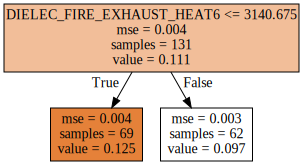

In [182]:
export_graphviz(best_rf_model.estimators_[0], out_file='gb_final.dot',
feature_names=v_feature_name, impurity=True, filled=True)
with open('gb_final.dot') as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

## DECISION TREE_ DIELEC

Text(0, 0.5, 'Variable')

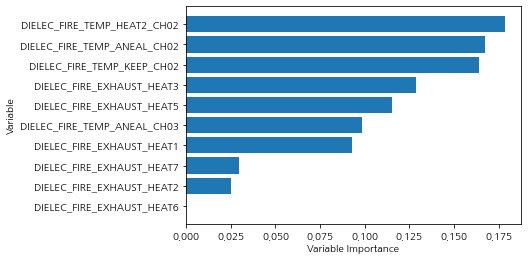

In [144]:


#최종모델
tree_final = DTR(random_state = 1234, max_depth = 4)
tree_final.fit(df_dielec_x,df_dielec_y)


#tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance7 = df_importance[:10]
df_importance7.round(4)


#설명변수 중요도 그래프
#중요도가 높은 변수를 상위에 그림
df_importance7.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance7))
plt.barh(y= coordinates, width =df_importance7["Importance"])
plt.yticks(coordinates, df_importance7["Feature"])
plt.xlabel("Variable Importance")
plt.ylabel("Variable")

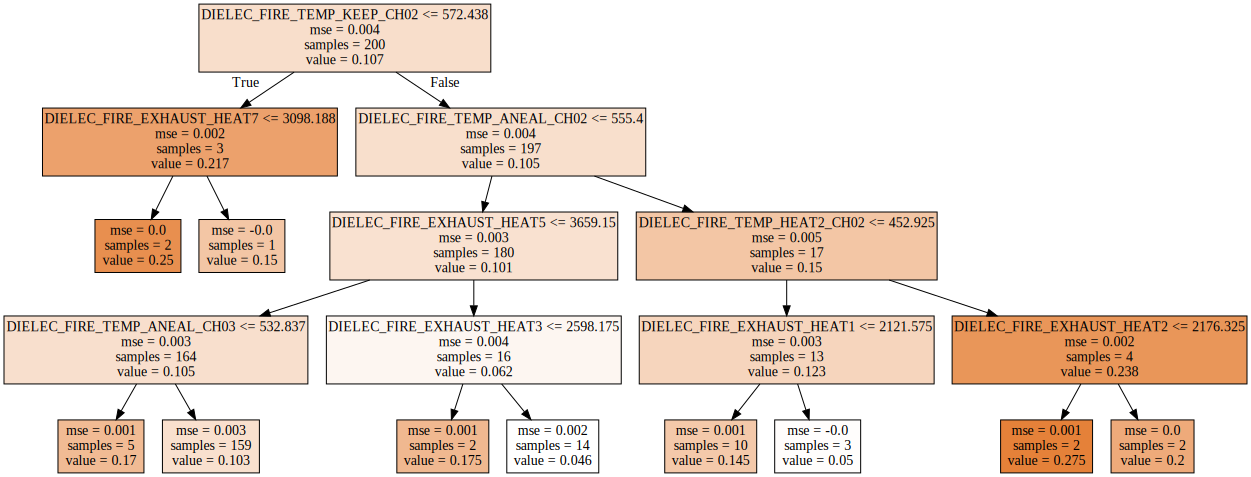

In [148]:
export_graphviz(tree_final, out_file='tree_final.dot',
feature_names=v_feature_name, impurity=True, filled=True)
with open('tree_final.dot') as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

In [145]:
v_feature_name = df_dielec_x.columns

df_importance=pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance']=tree_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

Feature  Importance
4   DIELEC_FIRE_TEMP_HEAT2_CH02       0.179
10  DIELEC_FIRE_TEMP_ANEAL_CH02       0.167
7    DIELEC_FIRE_TEMP_KEEP_CH02       0.164
14    DIELEC_FIRE_EXHAUST_HEAT3       0.129
16    DIELEC_FIRE_EXHAUST_HEAT5       0.115
11  DIELEC_FIRE_TEMP_ANEAL_CH03       0.098
12    DIELEC_FIRE_EXHAUST_HEAT1       0.093
18    DIELEC_FIRE_EXHAUST_HEAT7       0.030
13    DIELEC_FIRE_EXHAUST_HEAT2       0.025
17    DIELEC_FIRE_EXHAUST_HEAT6       0.000
15    DIELEC_FIRE_EXHAUST_HEAT4       0.000
0   DIELEC_FIRE_TEMP_HEAT1_CH01       0.000
1   DIELEC_FIRE_TEMP_HEAT1_CH02       0.000
8    DIELEC_FIRE_TEMP_KEEP_CH03       0.000
6    DIELEC_FIRE_TEMP_KEEP_CH01       0.000
5   DIELEC_FIRE_TEMP_HEAT2_CH03       0.000
3   DIELEC_FIRE_TEMP_HEAT2_CH01       0.000
2   DIELEC_FIRE_TEMP_HEAT1_CH03       0.000
9   DIELEC_FIRE_TEMP_ANEAL_CH01       0.000

## GradientBoostingRegressor_DIELEC

In [ ]:
para_lr= [x*0.1 for x in range(1,10)]
para_depth = [x for x in range(1,11)]
para_leaf = [x for x in range(1,21)]
estimator = GradientBoostingRegressor(random_state=1234)
param_grid={'criterion':['mse','friedman_mse','mae'],'max_feature':['auto','sqrt','log2'],'learning_rate':para_lr,
           'max_depth':para_depth,'min_samples_leaf':para_leaf}


grid_gb = GridSearchCV(estimator,param_grid,scoring='r2', n_jobs = -1 )
grid_gb.fit(df_dielec_x,df_dielec_y)

print("Best Score : {}".format(grid_search.best_score_))
print("Best params : {}".format(grid_search.best_params_))

In [171]:
from sklearn.ensemble import GradientBoostingRegressor as GBR


# 최종 모델
gb_final = GBR(
)

gb_final.fit(df_dielec_x, df_dielec_y)

# 설명변수 중요도 확인 및 테이블로 저장
v_feature_name = df_dielec_x.columns

df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = gb_final.feature_importances_

# 중요도 순으로 정렬
df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)

Feature  Importance
17    DIELEC_FIRE_EXHAUST_HEAT6       0.090
16    DIELEC_FIRE_EXHAUST_HEAT5       0.088
10  DIELEC_FIRE_TEMP_ANEAL_CH02       0.080
7    DIELEC_FIRE_TEMP_KEEP_CH02       0.072
6    DIELEC_FIRE_TEMP_KEEP_CH01       0.069
11  DIELEC_FIRE_TEMP_ANEAL_CH03       0.067
12    DIELEC_FIRE_EXHAUST_HEAT1       0.063
18    DIELEC_FIRE_EXHAUST_HEAT7       0.058
2   DIELEC_FIRE_TEMP_HEAT1_CH03       0.047
4   DIELEC_FIRE_TEMP_HEAT2_CH02       0.044
13    DIELEC_FIRE_EXHAUST_HEAT2       0.044
9   DIELEC_FIRE_TEMP_ANEAL_CH01       0.042
14    DIELEC_FIRE_EXHAUST_HEAT3       0.039
1   DIELEC_FIRE_TEMP_HEAT1_CH02       0.038
15    DIELEC_FIRE_EXHAUST_HEAT4       0.037
3   DIELEC_FIRE_TEMP_HEAT2_CH01       0.036
5   DIELEC_FIRE_TEMP_HEAT2_CH03       0.031
0   DIELEC_FIRE_TEMP_HEAT1_CH01       0.031
8    DIELEC_FIRE_TEMP_KEEP_CH03       0.024

## ANOVA_DIELEC

In [168]:
df

LOT_ID   불량률  TAT_1BLACK_1PRINT  TAT_1BLACK_2RTD  TAT_2AG_1PRINT  TAT_2AG_2RTD  TAT_2AG_3EXPOSURE  TAT_3BUS_1DEVELOP  TAT_3BUS_2FIRE  TAT_4DIELEC_FIRE  TAT_5MGO  TAT_6PHOS_1R_1DISPENSER  TAT_6PHOS_1R_2DRY  TAT_6PHOS_2G_1DISPENSER  TAT_6PHOS_2G_2DRY  TAT_6PHOS_3B_1DISPENSER  TAT_6PHOS_4FIRE  TAT_7PASTE  TAT_8AGING  BLACK_RTD_TEMP_GLASS_START  BLACK_RTD_TEMP_GLASS_END  BLACK_RTD_TEMP_WALL_START  BLACK_RTD_TEMP_WALL_MAX  BLACK_RTD_PRES_START  BLACK_RTD_PRES_END  BLACK_RTD_TEMP_GLASS_OUT  BLACK_RTD_TEMP_HOOD_START  BLACK_RTD_TEMP_HOOD_MAX  AG_RTD_TEMP_GLASS_START  AG_RTD_TEMP_GLASS_END  AG_RTD_TEMP_WALL_START  AG_RTD_TEMP_WALL_MAX  AG_RTD_PRES_START  AG_RTD_PRES_END  AG_RTD_TEMP_GLASS_OUT  AG_RTD_TEMP_HOOD_START  AG_RTD_TEMP_HOOD_MAX  AG_EXPOSURE_TEMP_MASK  BUS_DEVELOP_TEMP_OVEN1  BUS_DEVELOP_TEMP_OVEN2  BUS_DEVELOP_TEMP_OVEN3  BUS_DEVELOP_PH_TANK1  BUS_DEVELOP_TEMP_TANK1  BUS_DEVELOP_PH_TANK1 2  BUS_DEVELOP_TEMP_TANK2  BUS_DEVELOP_PH_TANK1 3  BUS_DEVELOP_TEMP_TANK3  \
0    LOT-101  0.10              86.35           219.00           83.40         71.15             155.80              373.2        6969.750          6542.100    534.50                    81.60            389.250                    81.60            377.400                    84.40         7190.600         0.0    9989.500                      44.550                  105.5400                    89.0850                 114.8900              212.8600            152.0300                   58.7450                    93.3050                  95.9400                   46.125                138.250                  77.805               101.700            337.975          386.630                 44.290                  92.455                92.875              23.581055               60.865615               61.361560               62.216165                 -0.33               23.378080                9.199720               31.028080                6.551125               34.268870   
1    LOT-102  0.05              89.00           214.00           85.30         71.00             167.70              369.0        6939.300          6510.000    544.00                    80.20            393.150                    79.85            375.000                    83.80         7131.750         0.0    9961.400                      44.210                  107.6900                    88.9650                 114.7850              195.5600            176.2750                   59.1350                    93.3850                  96.2000                   45.520                138.300                  77.905               101.930            355.335          374.835                 43.345                  92.335                92.750              23.538240               60.942760               61.674580               61.528220                 -0.33               23.418005                9.199685               30.997980                6.548710               34.225420   
2    LOT-103  0.15              88.90           219.00           85.20         70.05             158.95              368.0        6958.200          6513.600    532.50                    79.70            404.250                    80.30            389.850                    84.10         7230.950         0.0   10022.050                      43.870                  107.4950                    88.7900                 114.8950              200.6450            162.5550                   59.1650                    93.7900                  96.5450                   45.560                138.255                  78.330               101.695            347.565          380.270                 44.260                  93.865                94.305              23.521853               61.209690               61.818450               62.179380                 -0.33               23.421525                9.199600               31.031800                6.548800               34.178035   
3    LOT-104  0.00              87.35           224.50        

In [169]:
df_dielec=df[['불량률','DIELEC_FIRE_TEMP_HEAT1_CH01',
 'DIELEC_FIRE_TEMP_HEAT1_CH02',
 'DIELEC_FIRE_TEMP_HEAT1_CH03',
 'DIELEC_FIRE_TEMP_HEAT2_CH01',
 'DIELEC_FIRE_TEMP_HEAT2_CH02',
 'DIELEC_FIRE_TEMP_HEAT2_CH03',
 'DIELEC_FIRE_TEMP_KEEP_CH01',
 'DIELEC_FIRE_TEMP_KEEP_CH02',
 'DIELEC_FIRE_TEMP_KEEP_CH03',
 'DIELEC_FIRE_TEMP_ANEAL_CH01',
 'DIELEC_FIRE_TEMP_ANEAL_CH02',
 'DIELEC_FIRE_TEMP_ANEAL_CH03',
 'DIELEC_FIRE_EXHAUST_HEAT1',
 'DIELEC_FIRE_EXHAUST_HEAT2',
 'DIELEC_FIRE_EXHAUST_HEAT3',
 'DIELEC_FIRE_EXHAUST_HEAT4',
 'DIELEC_FIRE_EXHAUST_HEAT5',
 'DIELEC_FIRE_EXHAUST_HEAT6',
 'DIELEC_FIRE_EXHAUST_HEAT7']]

In [170]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
df_anova = ['DIELEC_FIRE_TEMP_HEAT1_CH01',
 'DIELEC_FIRE_TEMP_HEAT1_CH02',
 'DIELEC_FIRE_TEMP_HEAT1_CH03',
 'DIELEC_FIRE_TEMP_HEAT2_CH01',
 'DIELEC_FIRE_TEMP_HEAT2_CH02',
 'DIELEC_FIRE_TEMP_HEAT2_CH03',
 'DIELEC_FIRE_TEMP_KEEP_CH01',
 'DIELEC_FIRE_TEMP_KEEP_CH02',
 'DIELEC_FIRE_TEMP_KEEP_CH03',
 'DIELEC_FIRE_TEMP_ANEAL_CH01',
 'DIELEC_FIRE_TEMP_ANEAL_CH02',
 'DIELEC_FIRE_TEMP_ANEAL_CH03',
 'DIELEC_FIRE_EXHAUST_HEAT1',
 'DIELEC_FIRE_EXHAUST_HEAT2',
 'DIELEC_FIRE_EXHAUST_HEAT3',
 'DIELEC_FIRE_EXHAUST_HEAT4',
 'DIELEC_FIRE_EXHAUST_HEAT5',
 'DIELEC_FIRE_EXHAUST_HEAT6',
 'DIELEC_FIRE_EXHAUST_HEAT7']

    
for i in df_anova :
    model = ols('불량률 ~ C(%s)'%i, df_dielec).fit()
    print(anova_lm(model))
    print()

                                   df    sum_sq   mean_sq         F    PR(>F)
C(DIELEC_FIRE_TEMP_HEAT1_CH01)   26.0  0.081255  0.003125  0.822754  0.713763
Residual                        173.0  0.657132  0.003798       NaN       NaN

                                   df    sum_sq   mean_sq         F    PR(>F)
C(DIELEC_FIRE_TEMP_HEAT1_CH02)   36.0  0.161207  0.004478  1.264611  0.164451
Residual                        163.0  0.577181  0.003541       NaN       NaN

                                   df    sum_sq   mean_sq         F   PR(>F)
C(DIELEC_FIRE_TEMP_HEAT1_CH03)   24.0  0.102486  0.004270  1.175168  0.27058
Residual                        175.0  0.635902  0.003634       NaN      NaN

                                   df    sum_sq   mean_sq        F    PR(>F)
C(DIELEC_FIRE_TEMP_HEAT2_CH01)   27.0  0.102977  0.003814  1.03241  0.428479
Residual                        172.0  0.635410  0.003694      NaN       NaN

                                   df    sum_sq   mean_sq         

## DECISION TREE_AG

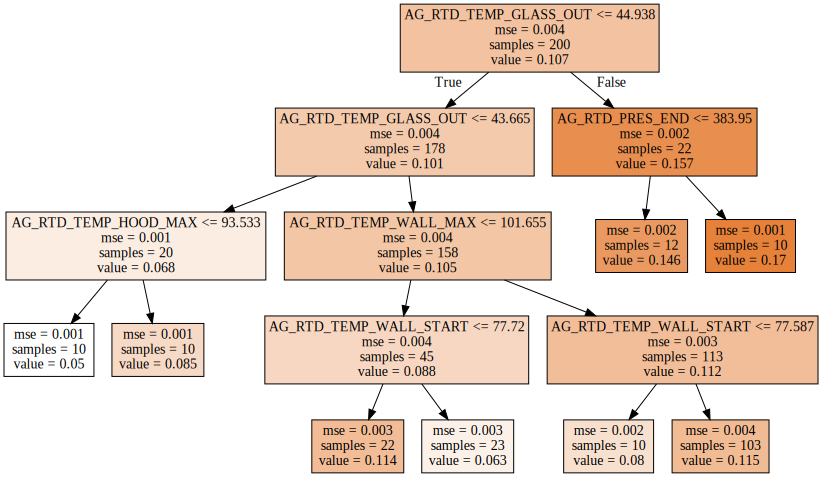

Text(0, 0.5, 'Variable')

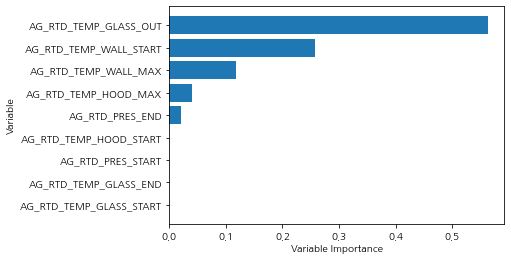

In [157]:

df_for_AG=df[['불량률','AG_RTD_TEMP_GLASS_START',
'AG_RTD_TEMP_GLASS_END',
'AG_RTD_TEMP_WALL_START',
'AG_RTD_TEMP_WALL_MAX',
'AG_RTD_PRES_START',
'AG_RTD_PRES_END',
'AG_RTD_TEMP_GLASS_OUT',
'AG_RTD_TEMP_HOOD_START',
'AG_RTD_TEMP_HOOD_MAX'
]]


df_for_AG_y = df_for_AG[["불량률"]]
df_for_AG_y


df_for_AG_x = df_for_AG.drop("불량률", axis=1, inplace=False)
df_for_AG_x


#의사결정나무
v_feature_name = df_for_AG_x.columns

#최종모델
tree_final = DTR(random_state = 1234, max_depth = 4, min_samples_leaf =10)
tree_final.fit(df_for_AG_x,df_for_AG_y)

# 최종모델시각화
export_graphviz(tree_final,out_file="tree_final.dot"\
,feature_names = v_feature_name,impurity = True,filled=True)

with open("tree_final.dot")as f :
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))


#tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance7 = df_importance[:10]
df_importance7.round(4)


#설명변수 중요도 그래프
#중요도가 높은 변수를 상위에 그림
df_importance7.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance7))
plt.barh(y= coordinates, width =df_importance7["Importance"])
plt.yticks(coordinates, df_importance7["Feature"])
plt.xlabel("Variable Importance")
plt.ylabel("Variable")

## RANDOMFOREST_AG

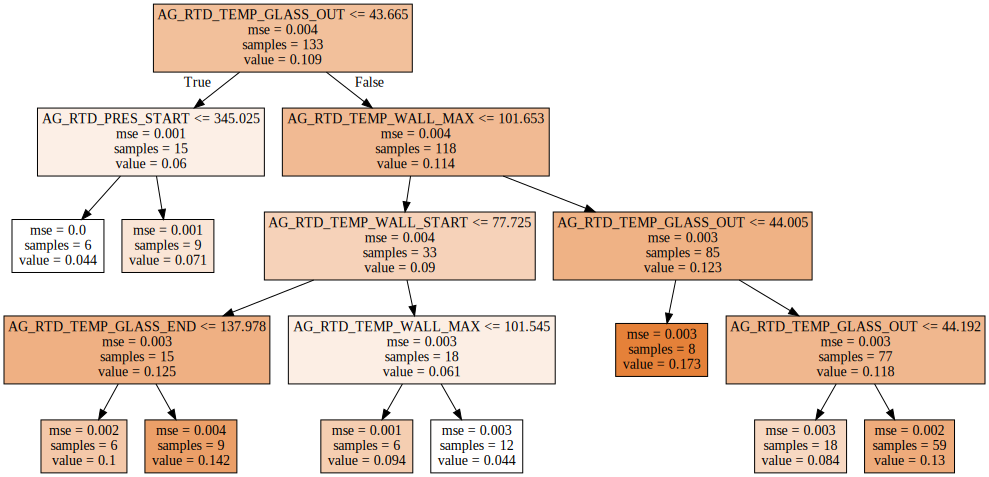

Text(0, 0.5, '변수')

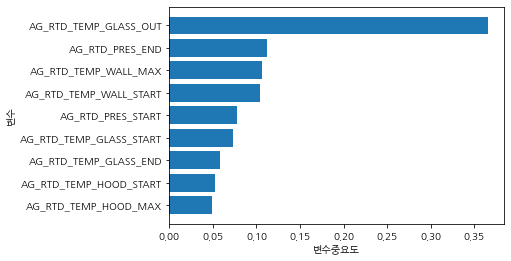

In [161]:
df_for_AG=df[['불량률','AG_RTD_TEMP_GLASS_START',
'AG_RTD_TEMP_GLASS_END',
'AG_RTD_TEMP_WALL_START',
'AG_RTD_TEMP_WALL_MAX',
'AG_RTD_PRES_START',
'AG_RTD_PRES_END',
'AG_RTD_TEMP_GLASS_OUT',
'AG_RTD_TEMP_HOOD_START',
'AG_RTD_TEMP_HOOD_MAX'
]]


df_for_AG_y = df_for_AG[["불량률"]]
df_for_AG_y


df_for_AG_x = df_for_AG.drop("불량률", axis=1, inplace=False)
df_for_AG_x

#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++==
#랜덤포레스
v_feature_name = df_for_AG_x.columns

# 최종모델생성
rf_final = RFR(random_state=1234, n_estimators=100\
,min_samples_leaf=6\
,min_samples_split=13,max_depth=4)
rf_final.fit(df_for_AG_x,df_for_AG_y)


#변수명 저장
v_feature_name = df_for_AG_x.columns
export_graphviz(rf_final.estimators_[0],out_file="rfr_final_0.dot"\
,feature_names =v_feature_name,\
impurity=True,filled = True)

with open("rfr_final_0.dot")as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))


df_importance = pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"]=rf_final.feature_importances_

df_importance.sort_values("Importance",ascending = False, inplace =True)
df_importance.round(3)


df_importance.sort_values("Importance",ascending=True,inplace = True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width=df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수중요도")
plt.ylabel("변수")

## GRADIENT BOOSTING _AG 

Text(0, 0.5, '변수')

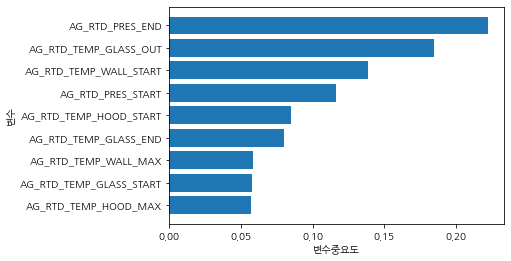

In [162]:
df_for_AG=df[['불량률','AG_RTD_TEMP_GLASS_START',
'AG_RTD_TEMP_GLASS_END',
'AG_RTD_TEMP_WALL_START',
'AG_RTD_TEMP_WALL_MAX',
'AG_RTD_PRES_START',
'AG_RTD_PRES_END',
'AG_RTD_TEMP_GLASS_OUT',
'AG_RTD_TEMP_HOOD_START',
'AG_RTD_TEMP_HOOD_MAX'
]]


df_for_AG_y = df_for_AG[["불량률"]]
df_for_AG_y


df_for_AG_x = df_for_AG.drop("불량률", axis=1, inplace=False)
df_for_AG_x

#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++==

# GradientBoostingRegressor 모델생성
gb_uncustomized =GradientBoostingRegressor(random_state=1234)
gb_uncustomized.fit(df_for_AG_x,df_for_AG_y)


# 최종모델생성
gb_final = GradientBoostingRegressor(random_state=1234,n_estimators=30\
,min_samples_leaf=10,min_samples_split=32\
,max_depth=4,learning_rate=0.3)
gb_final.fit(df_for_AG_x,df_for_AG_y)


# 변수명 저장
v_feature_name = df_for_AG_x.columns

# 설명변수의 중요도
df_importance = pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"]=gb_final.feature_importances_

df_importance.sort_values("Importance",ascending = False, inplace =True)
df_importance.round(3)


df_importance.sort_values("Importance",ascending=True,inplace = True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width=df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수중요도")
plt.ylabel("변수")

## ANOVA _AG

In [164]:
df_anova = ['AG_RTD_TEMP_GLASS_START',
'AG_RTD_TEMP_GLASS_END',
'AG_RTD_TEMP_WALL_START',
'AG_RTD_TEMP_WALL_MAX',
'AG_RTD_PRES_START',
'AG_RTD_PRES_END',
'AG_RTD_TEMP_GLASS_OUT',
'AG_RTD_TEMP_HOOD_START',
'AG_RTD_TEMP_HOOD_MAX']



for i in df_anova :
    model = ols('불량률 ~ C(%s)'%i, df_for_AG).fit()
    print(anova_lm(model))
    print()

                               df    sum_sq   mean_sq         F   PR(>F)
C(AG_RTD_TEMP_GLASS_START)  155.0  0.554762  0.003579  0.857623  0.75422
Residual                     44.0  0.183625  0.004173       NaN      NaN

                             df    sum_sq   mean_sq         F    PR(>F)
C(AG_RTD_TEMP_GLASS_END)   34.0  0.134507  0.003956  1.080931  0.362323
Residual                  165.0  0.603881  0.003660       NaN       NaN

                              df    sum_sq   mean_sq         F    PR(>F)
C(AG_RTD_TEMP_WALL_START)  159.0  0.589971  0.003711  1.000025  0.519885
Residual                    40.0  0.148417  0.003710       NaN       NaN

                            df    sum_sq   mean_sq        F   PR(>F)
C(AG_RTD_TEMP_WALL_MAX)  148.0  0.524138  0.003541  0.84301  0.78495
Residual                  51.0  0.214250  0.004201      NaN      NaN

                         df    sum_sq   mean_sq        F    PR(>F)
C(AG_RTD_PRES_START)  197.0  0.707137  0.003590  0.22973  0.985871
R

In [8]:
df=pd.read_csv('/home/piai/Desktop/POSCO_Ai-BigData_academy/Week4_BigData_Project/Data/Data결측치제거Merge/결측치삭제.csv',engine='python',encoding='cp949')
df.head()

JUDGE  BLACK_RTD_TEMP_GLASS_START  BLACK_RTD_TEMP_GLASS_END  \
0      0                        44.3                     102.3   
1      0                        44.6                     101.6   
2      0                        45.0                     114.3   
3      0                        44.0                     115.0   
4      0                        44.8                     109.6   

   BLACK_RTD_TEMP_WALL_START  BLACK_RTD_TEMP_WALL_MAX  BLACK_RTD_PRES_START  \
0                       88.8                    114.8                 229.5   
1                       88.7                    114.3                 216.9   
2                       90.3                    115.0                 217.4   
3                       88.6                    115.4                 242.5   
4                       89.2                    114.5                 218.3   

   BLACK_RTD_PRES_END  BLACK_RTD_TEMP_GLASS_OUT  BLACK_RTD_TEMP_HOOD_START  \
0               156.5                      58.9                       93.2   
1               155.9                      59.0                       93.9   
2               140.6                      58.7                       94.0   
3               152.4                      58.8                       94.0   
4               151.8                      57.3                       94.0   

   BLACK_RTD_TEMP_HOOD_MAX  ...  PHOS_FIRE_TEMP_KEEP_CH03  \
0                     96.0  ...                     480.0   
1                     96.0  ...                     480.0   
2                     95.7  ...                     480.0   
3                     97.0  ...                     480.0   
4                     95.5  ...                     480.0   

   PHOS_FIRE_TEMP_KEEP_CH04  PHOS_FIRE_TEMP_ANEAL_CH01  \
0                     475.0                      443.0   
1                     475.0                      445.0   
2                     475.0                      444.0   
3                     475.0                      444.0   
4                     475.0                      443.0   

   PHOS_FIRE_TEMP_ANEAL_CH02  PHOS_FIRE_TEMP_ANEAL_CH03  \
0                      419.0                      392.0   
1                      423.0                      395.0   
2                      421.0                      393.0   
3                      420.0                      393.0   
4                      420.0                      392.0   

   PHOS_FIRE_TEMP_ANEAL_CH04  PHOS_FIRE_EXHAUST_HEAT1  \
0                      372.0                   4115.0   
1                      374.0                   3642.0   
2                      372.0                   4063.0   
3                      372.0                   4131.0   
4                      372.0                   3632.0   

   PHOS_FIRE_EXHAUST_HEAT2  PHOS_FIRE_EXHAUST_HEAT3  PHOS_FIRE_EXHAUST_HEAT4  
0                   3973.0                   4432.0                   2506.0  
1                   4097.0                   4499.0                   2573.0  
2                   3972.0                   4460.0                   2502.0  
3                   4011.0                   4466.0                   2522.0  
4                   4073.0                   4482.0                   2584.0  

[5 rows x 97 columns]

In [3]:
for x in range(4000):
    if df['JUDGE'][x]=='양품':
        df['JUDGE'][x]=0
    else :
        df['JUDGE'][x]=1
        

In [19]:
df.to_csv("/home/piai/Desktop/POSCO_Ai-BigData_academy/Week4_BigData_Project/Data/Data결측치제거Merge/결측치삭제.csv",encoding='EUC-KR',index=False)


In [9]:
df

JUDGE  BLACK_RTD_TEMP_GLASS_START  BLACK_RTD_TEMP_GLASS_END  \
0         0                        44.3                     102.3   
1         0                        44.6                     101.6   
2         0                        45.0                     114.3   
3         0                        44.0                     115.0   
4         0                        44.8                     109.6   
...     ...                         ...                       ...   
3625      0                        44.0                     114.6   
3626      0                        44.2                     110.0   
3627      1                        44.2                     107.6   
3628      0                        43.8                     106.3   
3629      0                        41.0                     120.0   

      BLACK_RTD_TEMP_WALL_START  BLACK_RTD_TEMP_WALL_MAX  \
0                          88.8                    114.8   
1                          88.7                    114.3   
2                          90.3                    115.0   
3                          88.6                    115.4   
4                          89.2                    114.5   
...                         ...                      ...   
3625                       88.2                    113.5   
3626                       89.8                    115.0   
3627                       88.6                    115.0   
3628                       88.8                    116.2   
3629                       88.5                    115.0   

      BLACK_RTD_PRES_START  BLACK_RTD_PRES_END  BLACK_RTD_TEMP_GLASS_OUT  \
0                    229.5               156.5                      58.9   
1                    216.9               155.9                      59.0   
2                    217.4               140.6                      58.7   
3                    242.5               152.4                      58.8   
4                    218.3               151.8                      57.3   
...                    ...                 ...                       ...   
3625                 215.3               150.0                      58.4   
3626                 160.1               160.0                      59.2   
3627                 178.1               177.4                      58.9   
3628                 209.5               202.5                      59.0   
3629                 195.6               192.8                      59.0   

      BLACK_RTD_TEMP_HOOD_START  BLACK_RTD_TEMP_HOOD_MAX  ...  \
0                          93.2                     96.0  ...   
1                          93.9                     96.0  ...   
2                          94.0                     95.7  ...   
3                          94.0                     97.0  ...   
4                          94.0                     95.5  ...   
...                         ...                      ...  ...   
3625                       94.0                     96.2  ...   
3626                       94.6                     96.6  ...   
3627                       93.0                     95.6  ...   
3628                       93.0                     95.8  ...   
3629                       94.0                     98.1  ...   

      PHOS_FIRE_TEMP_KEEP_CH03  PHOS_FIRE_TEMP_KEEP_CH04  \
0                        480.0                     475.0   
1                        480.0                     475.0   
2                        480.0                     475.0   
3                        480.0                     475.0   
4                        480.0                     475.0   
...                        ...                       ...   
3625                     480.0                     475.0   
3626                     480.0                     475.0   
3627                     480.0                     475.0   
3628                     480.0                     475.0   
3629                     480.0                     475.0   

      PHOS_FIRE_TEMP_ANEAL_CH01  PHOS_FIR

In [10]:
df_dielec=df[['JUDGE','DIELEC_FIRE_TEMP_HEAT1_CH01',
 'DIELEC_FIRE_TEMP_HEAT1_CH02',
 'DIELEC_FIRE_TEMP_HEAT1_CH03',
 'DIELEC_FIRE_TEMP_HEAT2_CH01',
 'DIELEC_FIRE_TEMP_HEAT2_CH02',
 'DIELEC_FIRE_TEMP_HEAT2_CH03',
 'DIELEC_FIRE_TEMP_KEEP_CH01',
 'DIELEC_FIRE_TEMP_KEEP_CH02',
 'DIELEC_FIRE_TEMP_KEEP_CH03',
 'DIELEC_FIRE_TEMP_ANEAL_CH01',
 'DIELEC_FIRE_TEMP_ANEAL_CH02',
 'DIELEC_FIRE_TEMP_ANEAL_CH03',
 'DIELEC_FIRE_EXHAUST_HEAT1',
 'DIELEC_FIRE_EXHAUST_HEAT2',
 'DIELEC_FIRE_EXHAUST_HEAT3',
 'DIELEC_FIRE_EXHAUST_HEAT4',
 'DIELEC_FIRE_EXHAUST_HEAT5',
 'DIELEC_FIRE_EXHAUST_HEAT6',
 'DIELEC_FIRE_EXHAUST_HEAT7']]

In [11]:
df_dielec_x=df_dielec.drop('JUDGE',axis=1)
df_dielec_y=df_dielec['JUDGE']

### PANEL 별 DECISION TREE_DIELEC

In [12]:

#최종모델
tree_final = DecisionTreeClassifier(random_state = 1234, max_depth = 4)
tree_final.fit(df_dielec_x,df_dielec_y)

# 설명변수 중요도 확인 및 테이블로 저장
v_feature_name = df_dielec_x.columns

df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

# 중요도 순으로 정렬
df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)

Feature  Importance
16    DIELEC_FIRE_EXHAUST_HEAT5       0.392
18    DIELEC_FIRE_EXHAUST_HEAT7       0.313
3   DIELEC_FIRE_TEMP_HEAT2_CH01       0.106
14    DIELEC_FIRE_EXHAUST_HEAT3       0.094
15    DIELEC_FIRE_EXHAUST_HEAT4       0.068
10  DIELEC_FIRE_TEMP_ANEAL_CH02       0.019
11  DIELEC_FIRE_TEMP_ANEAL_CH03       0.005
9   DIELEC_FIRE_TEMP_ANEAL_CH01       0.003
8    DIELEC_FIRE_TEMP_KEEP_CH03       0.000
1   DIELEC_FIRE_TEMP_HEAT1_CH02       0.000
7    DIELEC_FIRE_TEMP_KEEP_CH02       0.000
6    DIELEC_FIRE_TEMP_KEEP_CH01       0.000
12    DIELEC_FIRE_EXHAUST_HEAT1       0.000
13    DIELEC_FIRE_EXHAUST_HEAT2       0.000
5   DIELEC_FIRE_TEMP_HEAT2_CH03       0.000
4   DIELEC_FIRE_TEMP_HEAT2_CH02       0.000
2   DIELEC_FIRE_TEMP_HEAT1_CH03       0.000
17    DIELEC_FIRE_EXHAUST_HEAT6       0.000
0   DIELEC_FIRE_TEMP_HEAT1_CH01       0.000

## PANEL 별 RANDOM FOREST_DIELEC

In [13]:

rf_final = RandomForestClassifier(n_estimators=100,max_depth=4, min_samples_split=70,
                                   min_samples_leaf=20, random_state=1234)
rf_final.fit(df_dielec_x, df_dielec_y)


df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = rf_final.feature_importances_

# 중요도 순으로 정렬
df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)

Feature  Importance
16    DIELEC_FIRE_EXHAUST_HEAT5       0.407
14    DIELEC_FIRE_EXHAUST_HEAT3       0.134
18    DIELEC_FIRE_EXHAUST_HEAT7       0.109
15    DIELEC_FIRE_EXHAUST_HEAT4       0.098
13    DIELEC_FIRE_EXHAUST_HEAT2       0.075
17    DIELEC_FIRE_EXHAUST_HEAT6       0.053
12    DIELEC_FIRE_EXHAUST_HEAT1       0.046
11  DIELEC_FIRE_TEMP_ANEAL_CH03       0.025
10  DIELEC_FIRE_TEMP_ANEAL_CH02       0.019
6    DIELEC_FIRE_TEMP_KEEP_CH01       0.016
9   DIELEC_FIRE_TEMP_ANEAL_CH01       0.008
7    DIELEC_FIRE_TEMP_KEEP_CH02       0.004
5   DIELEC_FIRE_TEMP_HEAT2_CH03       0.002
8    DIELEC_FIRE_TEMP_KEEP_CH03       0.002
0   DIELEC_FIRE_TEMP_HEAT1_CH01       0.001
4   DIELEC_FIRE_TEMP_HEAT2_CH02       0.001
1   DIELEC_FIRE_TEMP_HEAT1_CH02       0.001
3   DIELEC_FIRE_TEMP_HEAT2_CH01       0.000
2   DIELEC_FIRE_TEMP_HEAT1_CH03       0.000

## PANEL 별 GradientBoosting_DIELEC

In [14]:
gb_final = GradientBoostingClassifier(learning_rate = 0.1,n_estimators=100,max_depth=4,min_samples_leaf=10, random_state = 1234)
gb_final.fit(df_dielec_x,df_dielec_y)


df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = gb_final.feature_importances_

# 중요도 순으로 정렬
df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)



Feature  Importance
16    DIELEC_FIRE_EXHAUST_HEAT5       0.309
18    DIELEC_FIRE_EXHAUST_HEAT7       0.199
14    DIELEC_FIRE_EXHAUST_HEAT3       0.121
15    DIELEC_FIRE_EXHAUST_HEAT4       0.074
12    DIELEC_FIRE_EXHAUST_HEAT1       0.055
13    DIELEC_FIRE_EXHAUST_HEAT2       0.044
3   DIELEC_FIRE_TEMP_HEAT2_CH01       0.043
17    DIELEC_FIRE_EXHAUST_HEAT6       0.038
11  DIELEC_FIRE_TEMP_ANEAL_CH03       0.025
6    DIELEC_FIRE_TEMP_KEEP_CH01       0.022
9   DIELEC_FIRE_TEMP_ANEAL_CH01       0.017
10  DIELEC_FIRE_TEMP_ANEAL_CH02       0.015
2   DIELEC_FIRE_TEMP_HEAT1_CH03       0.012
5   DIELEC_FIRE_TEMP_HEAT2_CH03       0.009
7    DIELEC_FIRE_TEMP_KEEP_CH02       0.005
8    DIELEC_FIRE_TEMP_KEEP_CH03       0.005
1   DIELEC_FIRE_TEMP_HEAT1_CH02       0.004
0   DIELEC_FIRE_TEMP_HEAT1_CH01       0.002
4   DIELEC_FIRE_TEMP_HEAT2_CH02       0.002

In [16]:
df_dielec.columns.tolist()

['JUDGE',
 'DIELEC_FIRE_TEMP_HEAT1_CH01',
 'DIELEC_FIRE_TEMP_HEAT1_CH02',
 'DIELEC_FIRE_TEMP_HEAT1_CH03',
 'DIELEC_FIRE_TEMP_HEAT2_CH01',
 'DIELEC_FIRE_TEMP_HEAT2_CH02',
 'DIELEC_FIRE_TEMP_HEAT2_CH03',
 'DIELEC_FIRE_TEMP_KEEP_CH01',
 'DIELEC_FIRE_TEMP_KEEP_CH02',
 'DIELEC_FIRE_TEMP_KEEP_CH03',
 'DIELEC_FIRE_TEMP_ANEAL_CH01',
 'DIELEC_FIRE_TEMP_ANEAL_CH02',
 'DIELEC_FIRE_TEMP_ANEAL_CH03',
 'DIELEC_FIRE_EXHAUST_HEAT1',
 'DIELEC_FIRE_EXHAUST_HEAT2',
 'DIELEC_FIRE_EXHAUST_HEAT3',
 'DIELEC_FIRE_EXHAUST_HEAT4',
 'DIELEC_FIRE_EXHAUST_HEAT5',
 'DIELEC_FIRE_EXHAUST_HEAT6',
 'DIELEC_FIRE_EXHAUST_HEAT7']

In [18]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

df_anova = [
 'DIELEC_FIRE_TEMP_HEAT1_CH01',
 'DIELEC_FIRE_TEMP_HEAT1_CH02',
 'DIELEC_FIRE_TEMP_HEAT1_CH03',
 'DIELEC_FIRE_TEMP_HEAT2_CH01',
 'DIELEC_FIRE_TEMP_HEAT2_CH02',
 'DIELEC_FIRE_TEMP_HEAT2_CH03',
 'DIELEC_FIRE_TEMP_KEEP_CH01',
 'DIELEC_FIRE_TEMP_KEEP_CH02',
 'DIELEC_FIRE_TEMP_KEEP_CH03',
 'DIELEC_FIRE_TEMP_ANEAL_CH01',
 'DIELEC_FIRE_TEMP_ANEAL_CH02',
 'DIELEC_FIRE_TEMP_ANEAL_CH03',
 'DIELEC_FIRE_EXHAUST_HEAT1',
 'DIELEC_FIRE_EXHAUST_HEAT2',
 'DIELEC_FIRE_EXHAUST_HEAT3',
 'DIELEC_FIRE_EXHAUST_HEAT4',
 'DIELEC_FIRE_EXHAUST_HEAT5',
 'DIELEC_FIRE_EXHAUST_HEAT6',
 'DIELEC_FIRE_EXHAUST_HEAT7']



for i in df_anova :
    model = ols('JUDGE ~ C(%s)'%i, df_dielec).fit()
    print(anova_lm(model))
    print()

                                    df      sum_sq   mean_sq         F  \
C(DIELEC_FIRE_TEMP_HEAT1_CH01)     5.0    0.574110  0.114822  1.197366   
Residual                        3624.0  347.525064  0.095895       NaN   

                                  PR(>F)  
C(DIELEC_FIRE_TEMP_HEAT1_CH01)  0.307743  
Residual                             NaN  

                                    df      sum_sq   mean_sq         F  \
C(DIELEC_FIRE_TEMP_HEAT1_CH02)     9.0    2.542156  0.282462  2.959024   
Residual                        3620.0  345.557017  0.095458       NaN   

                                  PR(>F)  
C(DIELEC_FIRE_TEMP_HEAT1_CH02)  0.001654  
Residual                             NaN  

                                    df      sum_sq   mean_sq         F  \
C(DIELEC_FIRE_TEMP_HEAT1_CH03)     5.0    3.421592  0.684318  7.195042   
Residual                        3624.0  344.677582  0.095110       NaN   

                                  PR(>F)  
C(DIELEC_FIRE_TEMP_HEAT1_CH0